# Cryptopunks - ANOTHER(!!) Numerical Adventure

**Introduction**

Computer technology has made huge progress the last decade and as the electronic components improves, the amount of informations commuticated will drasticly escalate. This motivates some kind of "information manipulating" to reduce the data qunatity without losing its quality. Datasets of images are often transmitted using matrices. In this project we will investigate how to represent a similar matrix with less data using non-negative matrix factorization (NMF).

**Not identical**

Mathematicly we want to solve the system

$$ \text{min}_{W,H} \| A-WH\|_F$$

Where $\|\cdot\|_F$ is the Frobenius norm, a common way to "meassure" a matrix.

Such a minimization problem may be impossible to solve analyticly. Sometimes an answer doesn't even exist. We will utilize numerical techniques to approximate values for $W$ and $H$ where their product is close to $A$.

Our main motivation for studying such problems is to manipulate data to lower the amount of information transferred. In some cases we will also sacrifice some of the data quality to make sure the communication is smooth and efficient. Though this seems like a problem, we will later see how our numerical methods will capture the essence and reproduce $A$ quite well, with a more convinient data size. Even though the matrix is not perfectly reconstructed, the original message get sent.

Before introducing the numerical methods, we will define some important operations

**Frobenius norm**

Let $B$ be a matrix of any size. The Frobenius norm of $B$ is then. 

$$\|B\|_F = \bigg(\sum_{ij} b_{ij}^2\bigg)^\frac{1}{2}$$

Meaning the square root of the sum of all entries squared.

**Hadamard operations**

The numerical algorithm of interest utilizes some unusual operations for matrices. That is, Hadamard product and Hadamard division. Instead of the usual matrix multiplication, Hadamard product multiplies elements with identical indices. For two given matrices $A,B \in M_{m\times n}(\mathbb{R})$, the Hadamard product gives a new matrix $A \odot B \in  M_{m\times n}(\mathbb{R})$ with entries $ (A \odot B)_{ij} = A_{ij}\cdot B_{ij}$ where $i,j$ represents the $i$-th row and $j$-th column. Similarly for the division. $A \oslash B \in  M_{m\times n}(\mathbb{R}), \space (A \oslash B)_{ij} = \frac{A_{ij}}{B_{ij}}$. A remark is how the shape of the matrices needs to be similar to do these operations in contrary to the regualr matrix operations. 

It can be shown that the Hadamard product (with respect to the usual matrix addition) is associative, distributive and, unlike matrix multiplication, commutative. Hadamard division on the other hand, is none of the above mentioned. However, Hadamard division is right distributive $(A+B) \oslash C = A \oslash C + B \oslash C$.

**NMF**

The algorithm for matrix factorization we will be using is called "Algorithms for non-negative matrix factorization" proposed by Lee and Seung. From now we will refer to this method as NMF. The iteration rules are given by:

\begin{align}
    H_{k+1} &= H_k \odot (W^T_kA) \oslash (W_k^T W_k H_k) \\
    W_{k+1} &= W_k \odot (A H^T_{k+1}) \oslash (W_k H_{k+1} H_{k+1}^T)
\end{align}

Given spesific indices $i,j$ the above formula yields

\begin{align}
    (H_{k+1})_{ij}&= (H_k)_{ij} \cdot \frac{(W^T_kA)_{ij}} {(W_k^T W_k H_k)_{ij}} \\
    (W_{k+1})_{ij} &= (W_k)_{ij} \cdot \frac{(A H^T_{k+1})_{ij}}{ (W_k H_{k+1} H_{k+1}^T)_{ij}}
\end{align}

Division is problematic since it is undefined when the denominator matrix contains entries of $0$. We will solve this issue later on.

We claim that $W_kH_k$ improves in every iteration, meaning:

$$\| A-W_{k+1}H_{k+1} \|_F \leq \| A-W_kH_k \|_F$$

A consequence of this is that NMF will always converge to a local minima, which may or may not be the global minimizer. Hence, finding $W,H$ with this method will only give an approximation for $A$ and not an exact solution.

**Dividing by $0$**

In the NMF algorithm, there is a possibility that the denominator contains $0$´s. This is a valuable concern since it can totally ruin the code. Therefore, in every iteration we will add a small value $\delta \in [10^{-9}, 10^{-6}]$ to the denominator. It is important that we "add" a value to make sure the matrices presserve its non-negative properties. We will come back to exactly what these properties are. Without justification, this small change might give some advantages.

**Termination condition**

We need some kind of stopping condition to know when we should stop iterating. Since we are approaching a local solution, we have no guarantee that $ W_kH_k$ converge towards $A$. Another common termination condition is to check when the difference in each iteration is sufficiently small. However, if the convergence is slow such code might run for days on end. Therefore we will in advance fix an amount of max iterations and run these every time. Though some iterations goes to waste if the limit has been reach, we acquire time consistency in return. 

**Definition**

A matrix $M$ is said to be non-negative if every matrix entry is non-negative. Similarly can a matrix be positive or negative if all entries are strictly positve or strictly negative.

**Lemma**

For convenience, we will introduce an useful lemma.

Assume $M,N$ to be non-negative matrices such that $MN$ is properly defined. Then $MN$ is also non-negative.

Proof: from the defenition of matrix multiplication $(MN)_{ij} = \sum_{k} a_{ik}b_{kj}$. By assumption, every term in the sum is non-negativ since $a_{ik} \geq 0, b_{kj} \geq 0$. Therefore $(MN)_{ij} \geq 0$ $\quad \square$

Corollary:

Assume $A,B,C$ non-negative matrices such that $ABC$ is properly defined. Then $ABC$ is also non-negative. 

**1a)**


Assume $A$ to be non-negative and $W$ and $H$ to be positve matrices. Note that all positive matrices are non-negative. Also the transpose of a non-negative matrix is clearly non-negative. For a given $k$, we need only verify for an arbitrary combination $ij$. 

\begin{align}
    (H_{k+1})_{ij}&= (H_k)_{ij} \cdot \frac{(W^T_kA)_{ij}} {(W_k^T W_k H_k)_{ij}} \\
    (W_{k+1})_{ij} &= (W_k)_{ij} \cdot \frac{(A H^T_{k+1})_{ij}}{ (W_k H_{k+1} H_{k+1}^T)_{ij}}
\end{align}

Proof by induction. Let $k = 0$.

By assumption $W_k = W_0$ and $H_k = H_0$ are initiated positive, meaning they are non-negative. 

Further, assume it works for $k = n$. 

By assumption $W_K$ and $H_k$ is non-negative which, by the above mentioned lemma and corollary, gives that $(H_{n+1})_{ij}= (H_n)_{ij} \cdot \frac{(W^T_nA)_{ij}} {(W_n^T W_n H_n)_{ij}}$ is a product of non-negativ scalars, meaning  $(H_{n+1})_{ij}$ is non-negative. By the slightly modified algorithm, the denominator will never be $0$. Since $ij$ are arbitrary, the matrix $H_{n+1}$ is non-negative.  

Similarly, since $H_{n+1}$ is non-negative, $(W_{n+1})_{ij}$ is a product of only non-negative scalars, making $W_{n+1}$ non-negative. 

By induction, $H_k$ and $W_k$ is non-negative for iteratoins. $\quad \square$




**Claim**

Assume $A,B,C$ matrices such that $A \odot B$ and $B \oslash C$ are  properly defined. Then $(A \odot B) \oslash C$ = $A \odot (B \oslash C)$. Therefore, one can omit the brackes to express $A \odot B \oslash C$ unambiguously. 

The proof of this result comes directly from the definitions.

Keep in mind that this is a very spesific results which only works when Hadamard product and division is in THAT SPESIFIC order. 

**1b)**

Assume $(W^T_kA) \oslash (W_k^T W_k H_k)$ to be a matrix of ones. Call this matrix $X$. From the NMF formula, the next iteration for $H_{k+1}$ will be $H_{k+1} = H_k \odot X$. For a given entry $ij$ we get.

\begin{align}
    (H_{k+1})_{ij} &= (H_{k})_{ij} \cdot X_{ij} \\
    &= (H_{k})_{ij} \cdot 1 \\
    &= (H_{k})_{ij} \\
\end{align}

Since $ij$ is arbitrary, every entry is identical, making $H_{k+1} = H_k$ and thus $H_k$ a fixed point. $\quad \square$

Also this proves that a matrix of only ones is an identity under Hadamard product. Similarly it can be shown that it is for Hadamard division. 

**1c)**

Initiating $H$ and $W$ as zero matrices is a bad idea. A big concern will be how the new iterations multiply with their current iteration. Therefore, every iteration will at best remain $0$. Thankfully, by adding $\delta$ to the denominator we avoid any illegal operations. It will still run the fixed amount of iterations, however we will get no valuable information. 

**How W and H are initilized**

To make sure we obtain the properties of the non-negative matrix and minimize our zeros, we will initiate our matrices positive. Every entry in the matrix will be randomly generated uniformly from the half open interval $\left[0, 1\right)$. For some reason we could only find the $\left(a, b\right]$ in the numpy library. Therefore, say $x$ is our generated value, our value for the will be $1 - x$ making the interval boundaries swap.

Define the matrices


$$A_1 = 
\begin{pmatrix}
  1 & 0\\ 
  0 & 1
\end{pmatrix}, \quad 
A_2 = 
\begin{pmatrix}
  1 & 2\\ 
  1 & 1 \\
  1 & 2
\end{pmatrix}, \quad
A_3 =  
\begin{pmatrix}
  2 & 1 & 1\\
  2 & 1 & 1\\
  1 & 1 & 2
\end{pmatrix}, \quad 
A_4 = 
\begin{pmatrix}
  2 & 1 & 0\\
  1 & 2 & 3\\
  0 & 3 & 3
\end{pmatrix}
$$

**Initialization**

In [1]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y

!pip install opencv-python
!pip install --upgrade pip

%pip install numba
#%pip install --upgrade notebook

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
#%pip install opencv-python # Required to import cv2 !!!
import cv2

import os
import time

from scipy.signal import argrelextrema 
from numba import jit

In [3]:
#constants
d = 1
maxiter = 1000

A1 = np.array([[1,0],[0,1]])
A2 = np.array([[1,2],[1,1],[1,2]])
A3 = np.array([[2,1,1],[2,1,1],[1,1,2]])
A4 = np.array([[2,1,0],[1,2,3],[0,3,3]])

**Implementation of the NMF algorithm**

In [4]:
@jit(nopython = True, fastmath = True)
def NMF(A, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    NMF() is the implementation of the algorithm described above
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """
    A = A.astype(np.float64)
    if seed != 0: 
        np.random.seed(seed)
    
    m, n = np.shape(A)
    
    #Initializing W and H
    W_vals = (1 - np.random.uniform(0.0, 1.0, m * d)).astype(np.float64) 
    H_vals = (1 - np.random.uniform(0.0, 1.0, d * n)).astype(np.float64)

    W_old = np.sqrt(np.mean(A) / d) * np.reshape(W_vals, shape = (m, d)).astype(np.float64)
    H_old = np.sqrt(np.mean(A) / d) * np.reshape(H_vals, shape = (d, n)).astype(np.float64)

    diff_arr = np.zeros(maxiter-1)

    for k in range(1, maxiter):
        #Using the discribed operations to create W_(k+1) and H_(k+1)
        W_kT = np.transpose(W_old)
        H_new = np.divide(np.multiply(H_old, W_kT @ A), W_kT @ W_old @ H_old + delta)
        H_kT = np.transpose(H_new)
        W_new = np.divide(np.multiply(W_old, A @ H_kT), W_old @ H_new @ H_kT + delta)
        
        #Frobenius norm of A - W_kH_k
        diff_arr[k-1] = np.linalg.norm(A - W_new @ H_new)
        
        W_old = W_new
        H_old = H_new

    return W_new, H_new, diff_arr

**NMF of $A_1$ and $A_2$**

In the following code blocks we are using our NMF implementation to approximate the matricies $A_1$ and $A_2$, for two different complexities, $d$. In the first instance of approximations the value $d = 1$ is used, while the complexity occupy the value $d = 2$ in the second case. We are approximating our matricies with two different random initializations for each value of $d$.

In [5]:
#A1
W, H, diff_A1 = NMF(A1, 1, maxiter = 100000)

**$A^{NMF}_{1}$ for complexity parameter $d = 1$**

Initial Matrix | W | H | WH | $\| A - WH\|_F$
:---------: | :---------------: | :-------------------: | :----------------------: | :-----------------------:
**$A_1$**   | \begin{pmatrix}
                0.20257\\ 
                0.16856
               \end{pmatrix}    | \begin{pmatrix}
                                    2.91693 & 2.42721
                                   \end{pmatrix}        |   \begin{pmatrix}
                                                              0.59087 & 0.49167\\
                                                              0.49167 & 0.40913  
                                                             \end{pmatrix}        | $1.00000$
**$A_1$**   |\begin{pmatrix}
               0.37022 \\
               0.30267
             \end{pmatrix}       |   \begin{pmatrix}
                                       1.61898 & 1.32360
                                      \end{pmatrix}        |     \begin{pmatrix}
                                                                    0.59938 & 0.49002\\
                                                                    0.49002 & 0.40062
                                                                   \end{pmatrix} |  $1.00000$ 

In [6]:
#A2
W, H, diff_A1 = NMF(A2, 1, maxiter = 100000)

**$A^{NMF}_{2}$ for complexity parameter $d = 1$**

Initial Matrix | W | H | WH | $\| A - WH\|_F$
:---------: | :---------------: | :-------------------: | :----------------------: | :-----------------------:
**$A_2$**   | \begin{pmatrix}
                0.79232\\
                0.48357\\
                0.79232
               \end{pmatrix}    | \begin{pmatrix}
                                    1.38862 & 2.45257
                                   \end{pmatrix}        |   \begin{pmatrix}
                                                              1.10025 & 1.94324\\
                                                              0.67149 & 1.18599\\
                                                              1.10025 & 1.94324  
                                                             \end{pmatrix}        | $0.41115$
**$A_2$**   |\begin{pmatrix}
              0.54359\\
              0.33176\\
              0.54359
             \end{pmatrix}       |   \begin{pmatrix}
                                       2.02404 & 3.57483
                                      \end{pmatrix}        |     \begin{pmatrix}
                                                                    1.10025 & 1.94324\\
                                                                    0.67150 & 1.18599\\
                                                                    1.10025 & 1.94324
                                                                   \end{pmatrix} |  $0.41115$ 

Where $W$ and $H$ are the end result matrices. 

These results indicates that the values for the norm $\|A_1 - WH\|$ and $\|A_2-WH\|$ are constant. We will comment below why this is. Further one can see how $W,H$ varies in both $A_1^{NMF},A_2^{NMF}$, even though $WH$ is constant. Also in $A_2$, both cases of $W$ and $H$ is parallell.


A quicke comment regarding the matrix we are converging towards. The SVD of a matrix is a perfect reconstruction. Thus $A_2 = U \Sigma V^*$, where $U \Sigma V^*$ is the SVD of $A_2$. However, we are using $d = 1$ leaving $W$ and $H$ to be matrices of rank $1$. Removing the lowest singular value in $\Sigma$, one can construct the "best rank 1" approximation for $A_2$. Here we can see that our $WH$ for $A_2$ is exatly the same as truncated SVD. 

In [7]:
U, S, V = np.linalg.svd(A2)

M = np.array([[3.43961508,0],[0,0],[0,0]])

print(U @ M @ V)

[[1.10024505 1.94324222]
 [0.67149859 1.18599434]
 [1.10024505 1.94324222]]


**Why $\|A-WH\|_F = 1$**

This equality holds after the first iterations. Keep in mind that $A = I$ Since $d = 1$, say $H_0 = \begin{pmatrix}
  a & b
\end{pmatrix}$ and $W_0 = \begin{pmatrix}
  c \\
  d
\end{pmatrix}$. 

By the iteration formula:

\begin{align}
    H_{k+1} &= H_k \odot (W^T_kA) \oslash (W_k^T W_k H_k) \\
    &= \begin{pmatrix}
  a & b
\end{pmatrix} \odot \begin{pmatrix}
  c & d
\end{pmatrix} \oslash \begin{pmatrix}
  c & d
\end{pmatrix} \begin{pmatrix}
  c \\
  d
\end{pmatrix} \begin{pmatrix}
  a & b
\end{pmatrix} \\
&=\frac{1}{c^2 + d^2}
\begin{pmatrix}
  c & d
\end{pmatrix} \\
&= \frac{W_k^T}{\langle W_k, W_k\rangle}
\end{align}

Moreover


\begin{align}
    W_{k+1} &= W_k \odot (A H^T_{k+1}) \oslash (W_k H_{k+1} H_{k+1}^T) \\
    &= \begin{pmatrix}
  c \\
  d
\end{pmatrix} \odot \frac{1}{c^2 + d^2}
\begin{pmatrix}
  c \\
  d
\end{pmatrix} \oslash \begin{pmatrix}
  c \\
  d
\end{pmatrix} \frac{1}{c^2 + d^2}
\begin{pmatrix}
  c & d
\end{pmatrix} \frac{1}{c^2 + d^2}
\begin{pmatrix}
  c \\
  d
\end{pmatrix} \\
&= \begin{pmatrix}
  c \\
  d
\end{pmatrix}
\end{align}

Meaning $W_k$ will be a fixed point regardless of $H_k$. Moreover since $H_k$ is entierly determined by $W_K$, $H_k$ is a fixed point after it's first iteration.

Moreover, 

\begin{align}
    W_k H_k &= \frac{1}{c^2 + d^2} \begin{pmatrix}
  c \\
  d
\end{pmatrix} \begin{pmatrix}
  c & d
\end{pmatrix}\\
&=\frac{1}{c^2 + d^2} \begin{pmatrix}
  c^2 & cd \\
  cd & d^2
\end{pmatrix}\\
\implies W_kH_k - A &= \frac{1}{c^2 + d^2} \begin{pmatrix}
  c^2 & cd \\
  cd & d^2
\end{pmatrix} - \begin{pmatrix}
  1 & 0 \\
  0 & 1
\end{pmatrix}\\
&= \frac{1}{c^2 + d^2} \begin{pmatrix}
  -d^2 & cd \\
  cd & -c^2
\end{pmatrix}
\end{align}

Further, taking the Frobenius norm gives

\begin{align}
    \|A-W_kH_k\|_F &= \bigg \| \frac{1}{c^2 + d^2} \begin{pmatrix}
  -d^2 & cd \\
  cd & -c^2
\end{pmatrix} \bigg \|_F \\
&= \frac{1}{c^2 + d^2} \big((-d^2)^2 + (cd)^2 + (cd)^2 + (-c^2)^2\big)^{\frac{1}{2}} \\
&=\frac{1}{c^2 + d^2} \big((c^2 + d^2)^2\big)^{\frac{1}{2}} \\
&= 1
\end{align}

Proving $\|A-WH\|_F = 1$ if atleast one iteration has past. $\quad \square$


Also, since both $H_k$ and $W_k$ are fixed points, there is no need to run this spesific loop more than one iteration.  

**Why $\|A_2 - WH\|_F$ is constant**

One can also notice how the norm of $\|A_2-WH\|$ is constant for all initial $W_0$. This is a phenomena which is quite hard to explain but we will try to paint the picture. First rewrite the norm $f(W,H) = \|A-WH\|_f$ to a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$. From the iterations formula one can show

\begin{align}
    H_{k+1} &= H_k \odot (W^T_kA) \oslash (W_k^T W_k H_k) \\
    &= \begin{pmatrix}
  a & b
\end{pmatrix} \odot \begin{pmatrix}
  c & d
\end{pmatrix} A \oslash \begin{pmatrix}
  c & d
\end{pmatrix} \begin{pmatrix}
  c \\
  d
\end{pmatrix} \begin{pmatrix}
  a & b
\end{pmatrix} \\
&=\frac{1}{c^2 + d^2}
\begin{pmatrix}
  c & d
\end{pmatrix} A\\
&= \frac{W_k^T A}{\langle W_k, W_k\rangle}
\end{align}

Here one can observe how $H$ is completely dependant on how $W$ is initilized (excluding the case where $H_k$ contains zeros since the matrices are initiated positivly. Thus we can construct the matrix function $H(W) = \frac{W_k^T A}{\langle W_k, W_k\rangle}$ to reduce the number of variables. Technically, when we calculate $W H(W)$ one can argue that $W$ and $H$ are an iteration apart. However, by converges of both $H$ and $W$ in NMF our $W H(W)$ will manoeuvre identically to $W_k H_k$. New define a function $f$

$$f: \mathbb{R}^n \rightarrow \mathbb{R}, \quad \quad f(x) = \|A - x H(x)\|_F =  \bigg \|A- \frac{xx^t}{\langle x,x \rangle} A\bigg \|_F$$

We want to prove this function convex.

In Facilities Location Models & Methods Love, Morris and Wesolowsky claims this problem to be equivilant to proving $g(x) = \big \|\frac{xx^t}{\langle x,x \rangle} A\big \|_F$ convex. Here we will use this claim.

Writing out the defenition of the function one can achive

$$g(\vec x) = \frac{5 x_1^2 + 6 x_1 x_2 + 10 x_1 x_3 + 2 x_2 ^2 +6 x_2 x_3 + 5x_3^2}{x_1^2 + x_2^2 + x_3 ^2}, \quad \vec x = [x_1, x_2,x_3]^T$$

Here we have skipped quite alot of important calculation. However, the sheer ugliness in every step made us omit these. The general approach was just to write out every defenition and simplify. A key observation is how we can further rewrite the system. Note that

$$
A A^T = \begin{pmatrix}
  1 & 2 \\
  1 & 1 \\
  1 & 2
\end{pmatrix}
\begin{pmatrix}
  1 & 1 & 1 \\
  2 & 1 & 2
\end{pmatrix}
= \begin{pmatrix}
  5 & 3 & 5 \\
  3 & 2 & 3 \\
  5 & 3 & 5
\end{pmatrix} = Q
$$

Note that $Q$ is symmetric. We can write


$$g(x) = \frac{x^T A A^T x}{\langle x, x \rangle } = \frac{x^T}{\|x\|} Q \frac{x}{\|x\|}$$

Here $\|\cdot\|$ is the induced norm from the usual inner product, meaning euclidean length. Define now a new function $h(x) = x^T Q x$. Using Gateaux differential one can easily derive the Hessian to be $\nabla ^2 h = 2Q$. A well known result is how $h(x)$ is convex if its hessian is positive semi definite. One can verify that $Q$ is positive semi definite by seeing the eigenvalues. The eigenvalues of $Q$ will be $[6 + \sqrt{34}, 6 - \sqrt{34}, 0]$ which are all non-negative, thus positive semi definite. Therefore, $h$ is convex. 

Our function $g$ can be looked at as a restriction of $h$ onto normal vectors $g(x) = h\big(\frac{x}{\|x\|}\big)$. It is worth pointing out how the direction of the vector is the only property to define the value of $g$. It's not trival to see how $g$ inherits the convexity of $h$. To understand the geometrics, a straigt line in the $g$ space might be a curved line in the $h$-space. Luckily a curved line can be split into an infinite amount of straight lines, much like $dx$. Assume $g$ not convex. If any point in the $g$-space yields a concave curvature, then there would also exists such a point in the $h$-space, which gives a contradiction, meaning $g$ convex. When $g$ is convex, so is $f$, which concludes the proof. $\quad \square$

Now that $f$ is convex we get some very handy results. First, all local minimas in a convex function is a global minimizer. Since our algorithm will be steadily decreasing towards a local minima, and all local minimas are global, then, given enough iterations, the $\|A-WH\|$ will be constant.

From our results we can see that $\|A-WH\|$ is constant, which is good, but we can also see that the direction og $W$ is always the same. $W_1$ and $W_2$ are parallell, and similar for $H_1, H_2$. This is due to the local minimas in $f(W)$ will be a "V-Valley" where the base is given by the direction of $W_1$.

In [8]:
#A1
W, H, diff = NMF(A1, 2, maxiter = 1000)

**$A^{NMF}_{1}$ for complexity parameter $d = 2$**

Initial Matrix | W | H | WH | $\| A - WH\|_F$
:---------: | :---------------: | :-------------------: | :----------------------: | :-----------------------:
**$A_1$**   | \begin{pmatrix}
                0.50181622 & 0.0\\
                0.0 & 0.53455006
               \end{pmatrix}    | \begin{pmatrix}
                                    1.99276143 & 0.0\\
                                    0.0 & 1.87073219
                                   \end{pmatrix}        |   \begin{pmatrix}
                                                              1.0 & 0.0\\
                                                              0.0 & 1.0
                                                             \end{pmatrix}        | $7.331870299215826 \cdot 10^{-10}$
**$A_1$**   |\begin{pmatrix}
              0.76936699 & 0.0\\
              0.0 & 0.4603443
             \end{pmatrix}       |   \begin{pmatrix}
                                       1.29976982 & 0.0\\
                                       0.0 & 2.17228713
                                      \end{pmatrix}        |     \begin{pmatrix}
                                                                    1.0 & 0.0\\
                                                                    0.0 & 1.0
                                                                   \end{pmatrix} |  $8.965727898130247 \cdot 10^{-10}$ 

In [9]:
#A2
W, H, diff = NMF(A2, 2, maxiter = 1000)

**$A^{NMF}_{2}$ for complexity parameter $d = 2$**

Initial Matrix | W | H | WH | $\| A - WH\|_F$
:---------: | :---------------: | :-------------------: | :----------------------: | :-----------------------:
**$A_2$**   | \begin{pmatrix}
  0.43152274 & 0.83312453\\
  0.62054874 & 0.20323818\\
  0.43152274 & 0.83312453
\end{pmatrix}                  | \begin{pmatrix}
                                    1.4672662 & 0.9938403\\
                                    0.44031986 & 1.8858349
                                   \end{pmatrix}        |   \begin{pmatrix}
                                                              1.0 & 2.0\\
                                                              1.0 & 1.0\\
                                                              1.0 & 2.0 
                                                             \end{pmatrix}        | $1.069469572613266 \cdot 10^{-9}$
**$A_2$**   |\begin{pmatrix}
              0.65123875 & 0.53477142\\
              0.68991579 & 0.13801833\\
              0.65123875 & 0.53477142
             \end{pmatrix}       |   \begin{pmatrix}
                                       1.42172611 & 0.92715087\\
                                       0.13859541 & 2.61084149
                                      \end{pmatrix}        |     \begin{pmatrix}
                                                                    1.0 & 2.0\\
                                                                    1.0 & 1.0\\
                                                                    1.0 & 2.0
                                                                   \end{pmatrix} |  $9.748123822533166 \cdot 10^{-10}$ 

A quick note is how even though the WH seems to have created the matrix perfectly, the frobenius norm of the difference is still non-zero. We think this is due to a computer error. If the WH would perfectly be $A$ then $\|A-A\|_F$ would give $0$. Now this is not the case, making it likely that the $1.0$ and $2.0$ represents some more inforomation than it seems. The computer rounding is probably the cause of this.

One can observe $\|A - WH \|_F$ to be very small. The magnitudes in both cases is $e-10$. This illustrates how NMF can reconstruct the matrix almost perfectly. Also the frobenius norm gives $\sqrt{a_{11}^2 +...+a_{ij}^2}$. Since $a_{ij}^2 \simeq e-20$ will give computer errors, meaning the matrix might as well be perfectly constructed. 

These results make sense. A well known result is how $Rank(AB) \leq Min\{Rank(A),Rank(B)\}$. To even grasp the potential of reconstructing $A_i$ perfectly, we need an rank($W$) and rank($H$) to be atleast rank($A_i$), which is $2$ in both our cases. With $d = 2$ we can create two linear independent column vectors in $W$ and two row vectors in $H$ then perfectly recreate $A_i$. Since it's rank is two. Therefore, $W$ and $H$ carrys enough information to reconstruct it perfectly making it reasonable that the difference is low. 

**Rank of matricies $A_3$ and $A_4$**

The rank of a matrix i defined as the dimension of the span of the row vectors in the matrix. Clearly, in $A_3$ the two first row vectors are linearly dependent, and the third is independent of the others. Therefore, $Rank(A_3) = 2$. Further, in $A_4$ the two first row vectors are clearly independant. Any sum of the two first row vectors which yields $0$ in the frist coordinate will be different from $(0,3,3)$, concluding all row vectors are linearly independant. Therefore, $Rank(A_4) = 3$. We can ilustrate this using the rank function in the numpy linalg library. 

In [10]:
r3 = np.linalg.matrix_rank(A3)
print('Rank of A3:', r3)

r4 = np.linalg.matrix_rank(A4)
print('Rank of A4:', r4)

Rank of A3: 2
Rank of A4: 3


**$\|A-W_k H_k\|_F$ as a function of number of iteration for $A_3$ and $A_4$**

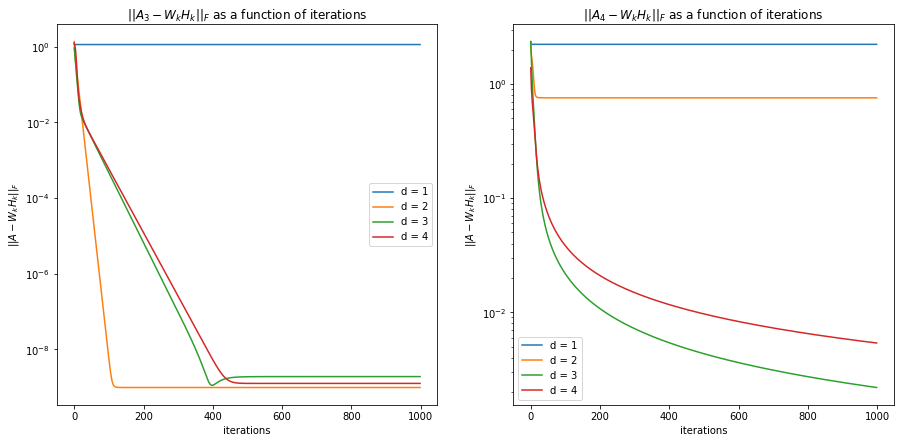

In [141]:
ds = [1, 2, 3, 4]
As = [A3, A4]
h = np.arange(0, maxiter-1)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
for i in range(len(As)):
    axs[i].set_title(f"$||A_{i+3}-W_k H_k||_F$ as a function of iterations")
    for d in ds:
        W, H, diff_arr = NMF(As[i], d)
        axs[i].semilogy(h, diff_arr, label = f"d = {d}")
        axs[i].set_xlabel("iterations")
        axs[i].set_ylabel(r"$||A-W_k H_k||_F$")
        axs[i].legend()


**$\|A - WH\|$ as a function of iterations**

From our earlier remark, the rank of the matrices are $2$ and $3$ respectivly. Conviniently, a $d$-value equal to it's corresponding matrix rank generally produces the closest approximate for $A$. We can also see how large values of $d$ proves good when estimating $A$. This makes sense since the $W$ and $H$ could perfectly recreate $A$ if $d \geq rank(A)$. A potential explaination might be how higher $d$-values gives more local minimas. Since the alogrithm doesn't necessary converge to the global minima, it might get stuck in a bad hole.

Generally we also see a steady decrease in difference between $A$ and $WH$ with iterations. This result validates $\| A-W_{k+1}H_{k+1} \|_F \leq \| A-W_kH_k \|_F$. After a set amount of iterations, the algorithm reaches a fixed point, making the difference steady throughout the iterations. 

We can also see small deviation in $d=3$ for $A_3$. Right before reaching it's steady state, the norm value increases slightly. Most likely this is due to the adjustment in our algorithm where we add a small $\delta$. 

We see an recurring trend in how the convergence value of $\|A-WH\|$ is dependent on $\delta$. Assume $d$ to be sufficiently large, meaning $W$ and $H$ could reconstruct $A$ perfectly, and further assume that $A$ infact is perfectly reconstructed. Let the true value in a given coordinate in $A$ be $\frac{a}{x}$. meaning our iteration value would be $\frac{a}{x + \delta}$. Frobenius norm of the difference is then 

$$ \| A- WH\|_F = \bigg(\sum_i \bigg(\frac{a_i}{x_i} - \frac{a_i}{x_i + \delta}\bigg)^2\bigg)^{\frac{1}{2}}$$

Omitting the indexing
\begin{align}
\bigg(\frac{a}{x} - \frac{a}{x + \delta}\bigg) &= \frac{a(x + \delta)}{x (x+\delta)}-\frac{ax}{x (x+\delta)} \\
&=\frac{a \delta}{x (x+\delta)} \\
& \approx \frac{a\delta}{x^2}
\end{align}

Here we assume the $x$ to be $\delta << x$ since this is the case for our matrices. 
\begin{align}
\| A- WH\|_F &= \bigg(\sum_i \bigg(\frac{a_i}{x_i} - \frac{a_i}{x_i + \delta}\bigg)^2\bigg)^{\frac{1}{2}} \\
&\approx \bigg(\sum_i \bigg( \frac{a_i \delta}{x_i^2} \bigg)^2 \bigg)^{\frac{1}{2}} \\
&= \delta \bigg(\sum_i \bigg( \frac{a_i}{x_i^2} \bigg)^2 \bigg)^{\frac{1}{2}}
\end{align}

Now by assumption, the magnitude $M(\frac{a}{x})$ will be the magnitude of the elements in $A$. further, from iteration formula

\begin{align}
    (H_{k+1})_{ij}&= (H_k)_{ij} \cdot \frac{(W^T_kA)_{ij}} {(W_k^T W_k H_k)_{ij}} \\
    (W_{k+1})_{ij} &= (W_k)_{ij} \cdot \frac{(A H^T_{k+1})_{ij}}{ (W_k H_{k+1} H_{k+1}^T)_{ij}}
\end{align}


one can deduce that $M(x)$ would be around the magnitude of elements in $W H H^T$. Now since $WH = A$ the magnitude of $W$ and $H$ will be around $\sqrt{M(A)}$. Therefore, 

$$M\bigg(\frac{a}{x^2}\bigg) \simeq \frac{1}{M(W)} \simeq \frac{1}{\sqrt{M(A)}}$$

Meaning the general magnitude of the frobenius norm, with sufficiently few entries, will be

\begin{align}
\| A- WH\|_F &= \delta \bigg(\sum_i \bigg( \frac{a_i}{x_i^2} \bigg)^2 \bigg)^{\frac{1}{2}}\\
&\simeq \delta \frac{1}{\sqrt{M(A)}}
\end{align}

Now plotting the limit for $100A_2$ and $10000A_2$ validates our claim

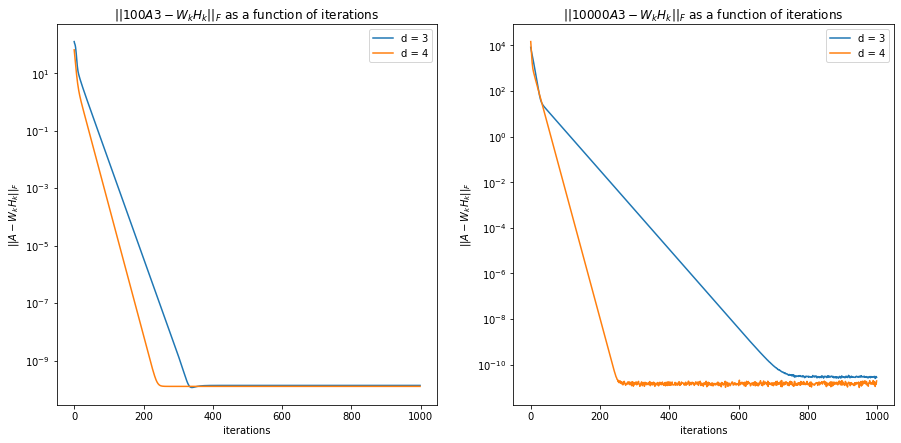

In [129]:
#plot samme som over 100A_2 og 10000A_2
ds = [3, 4]
As = [100 * A3, 10000 * A3]
label = ["100A3", "10000A3"]
h = np.arange(0, maxiter-1)


fig, axs = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
for i in range(len(As)):
    axs[i].set_title(f"$||{label[i]}-W_k H_k||_F$ as a function of iterations")
    for d in ds:
        W, H, diff_arr = NMF(As[i], d)
        axs[i].semilogy(h, diff_arr, label = f"d = {d}")
        axs[i].set_xlabel("iterations")
        axs[i].set_ylabel(r"$||A-W_k H_k||_F$")
        axs[i].legend()

Concerning the rigthmost plot, we are moving towords the domain of floating point errors, which would be a plausible explanation to the turbulance detected at the limit.   

**Loading images**

In [13]:
def load_images(N):
    """
    Loads images from cryptopunk dataset. The loading order is deterministic,
    so for a certain N the exact same images will be loaded. 
    Input:
        N, integer, number of images to load
    Output:
        faces, (24,24,4,N) numpy array containing images
    """

    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Iteration variable
    i = 0

    # Iterate over folders
    for subdir, dirs, files in os.walk('./imgs'):

        # Iterate over files
        for file in files:

            # Filepath to load from
            filepath = subdir + os.sep + file

            # Make sure that the file is a .png
            if filepath[-3:] == 'png':

                # Load the image
                im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)

                # Convert it to RGBA and rescale pixels
                faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

                i+=1
            if i == N:
                break
    return faces

# Number of faces to keep in final array
N = 500

# Load all 10000 images
faces = load_images(10000)

# Select N random images
choices = np.random.choice(faces.shape[-1],N, replace = False)
faces = faces[:,:,:,choices]

# Check that the shape is correct
print(faces.shape)


(24, 24, 4, 500)


**Plotting images**

In [14]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img, vmin = 0,vmax =1)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx], vmin = 0,vmax =1)
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams


**Plotting our data sample**
<a id='original'></a>

[Denoising comparison](#denois)

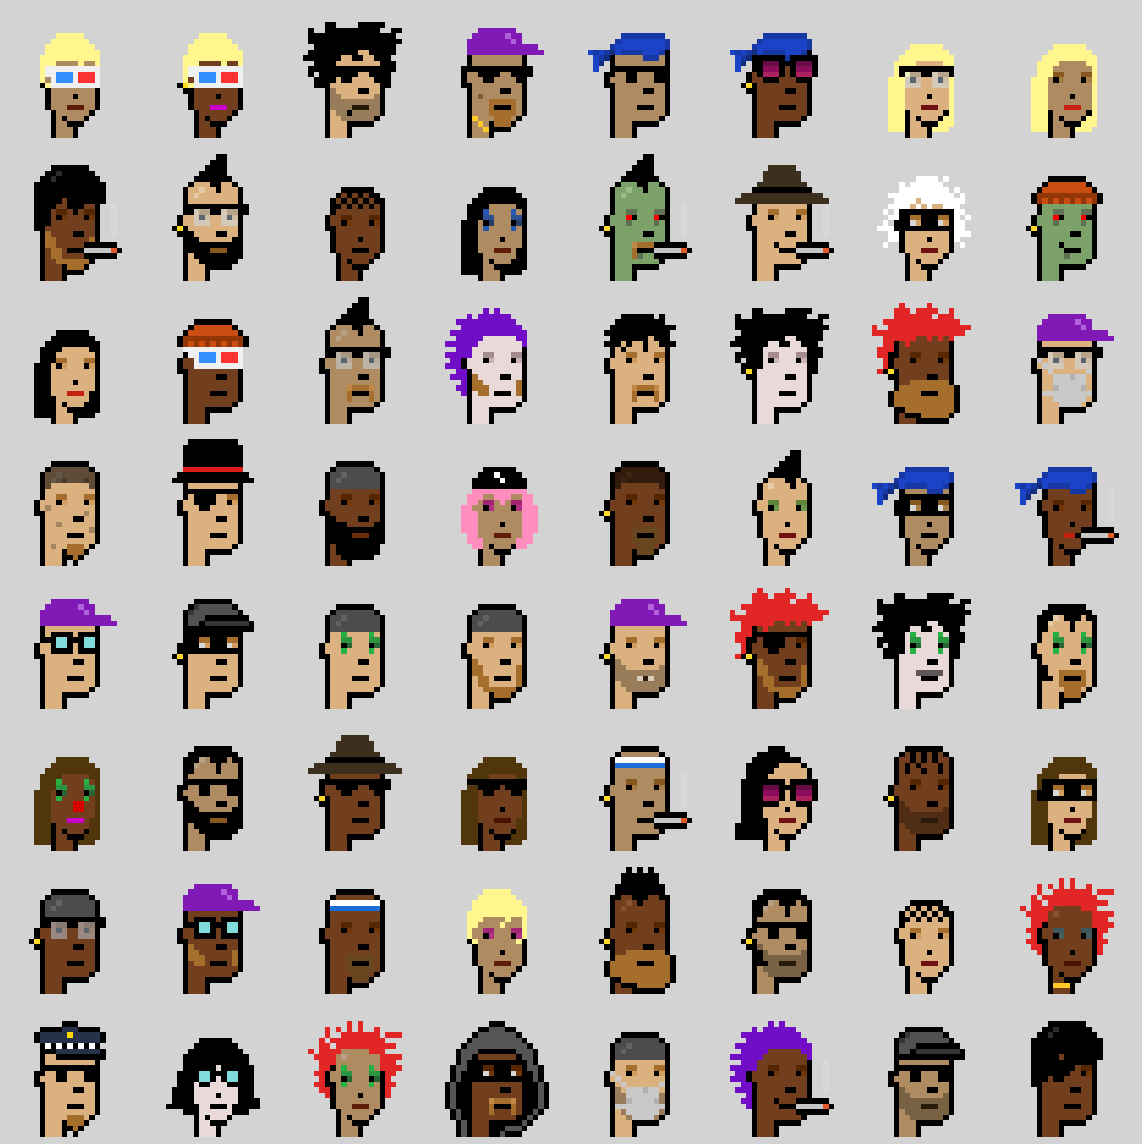

In [15]:
# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
plotimgs(faces, 8, filename="punks.png")

**Split images into opacity and rgb channels**

In [16]:
# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)
#print(faces_reshaped.shape)


**Mean face**

(24, 24, 4)


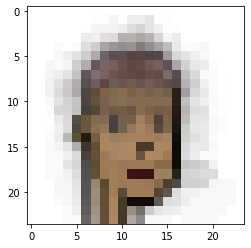

In [17]:
faces_mean = np.mean(faces, axis = -1)
print(faces_mean.shape)

plt.imshow(faces_mean)
plt.show()

**Recuring traits**

In the portrait of mr. Average one can notice the general shape and contour of a NFT head. Noticing how the face, mouth, eyes are visible in high resolution, one can conclude these to be repeating paterns. Some traits in the CryptoPunks' configurations, such as head shape and mouth position, are identical. Incest might be a serious consern in our CryptoPunk society?

A noticable remark are how the pixels near the circumference are all white. These are tiles which always is "background" and thus a matrix value of exactly $1$. There are some tiles which are very light grey, which means some rare features occupy these squares. 

When converting our $500$ faces to a $2$ dimensional matrix, every row will represent a unique face. This matrix could theoretically have a maximum rank of $500$. In some sense the matrix has $1728$ "opportunities" (column vectors) to achive $500$ linear independent ones. However, these white ones will give columns vectors which consist of entirely ones. These column will all be linear dependent removing one such "opportunity". Also the fact that some features are recuring, such as the general face shape, the "chunk" represeneting the face in eacy row will be identical, further removing many "oppertunities". In practice the rank of the matrix will not be it's maximum. We can see this when plotting the rank of the reshaped faces-matrix. 

In [18]:
rank = np.linalg.matrix_rank(faces_reshaped)
print(rank)

382


**Facial features**
<a id='Facial_features'></a>

[Denoising comparison](#features_nois)

To further understand our matrix factorization we will examine what the $W$-vector represents and how it's values varies with $d$. The shaping of $W$ ensure that every column can conveniently be reshaped into an $24 \times 24 \times 3$. We will plot the columns in $W$ for $d \in \{16, 64, 144\}$

d: 16


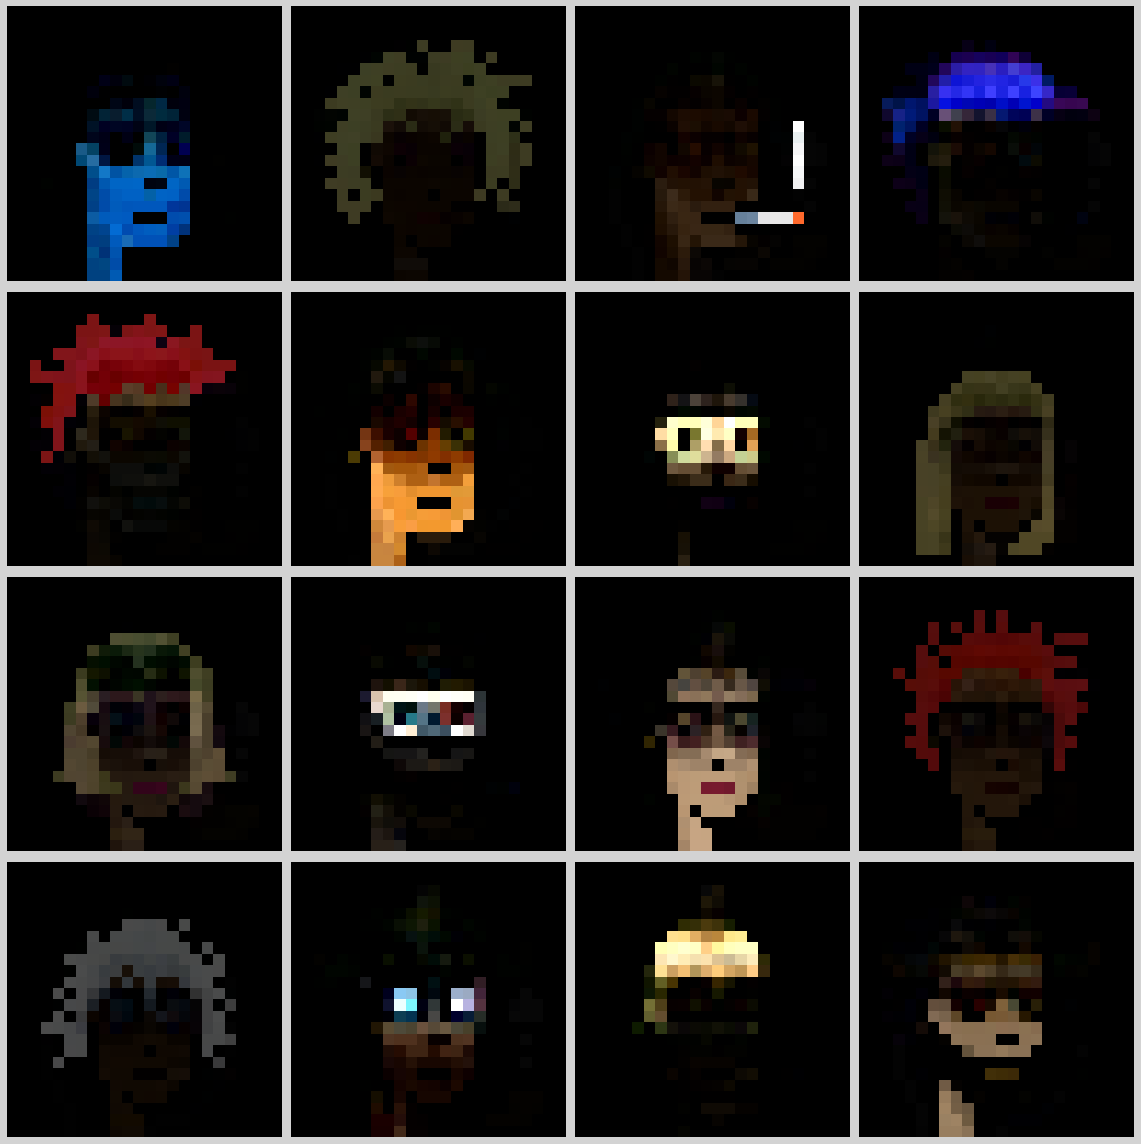

d: 64


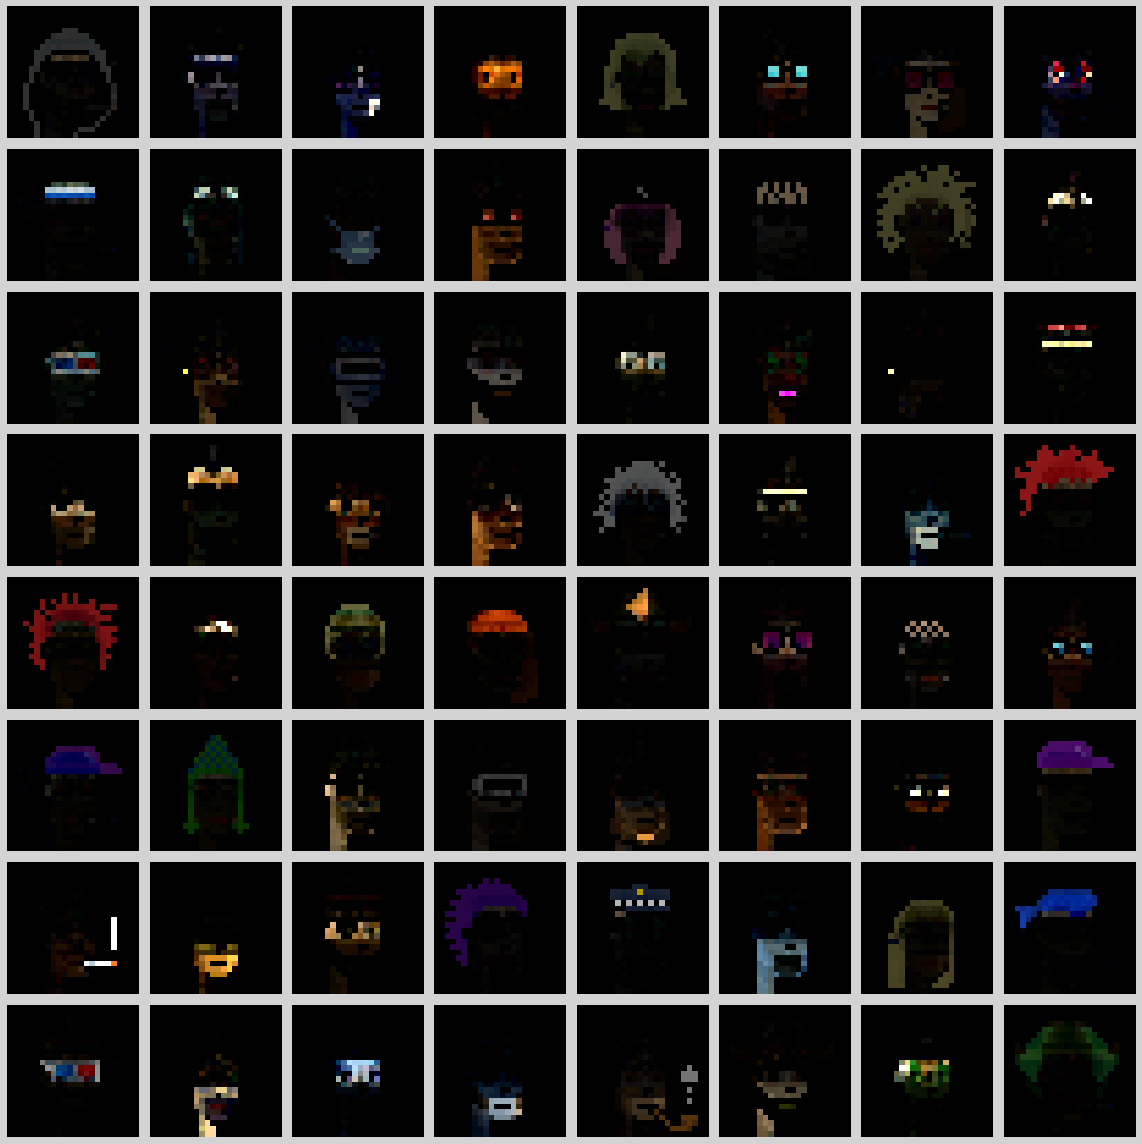

d: 144


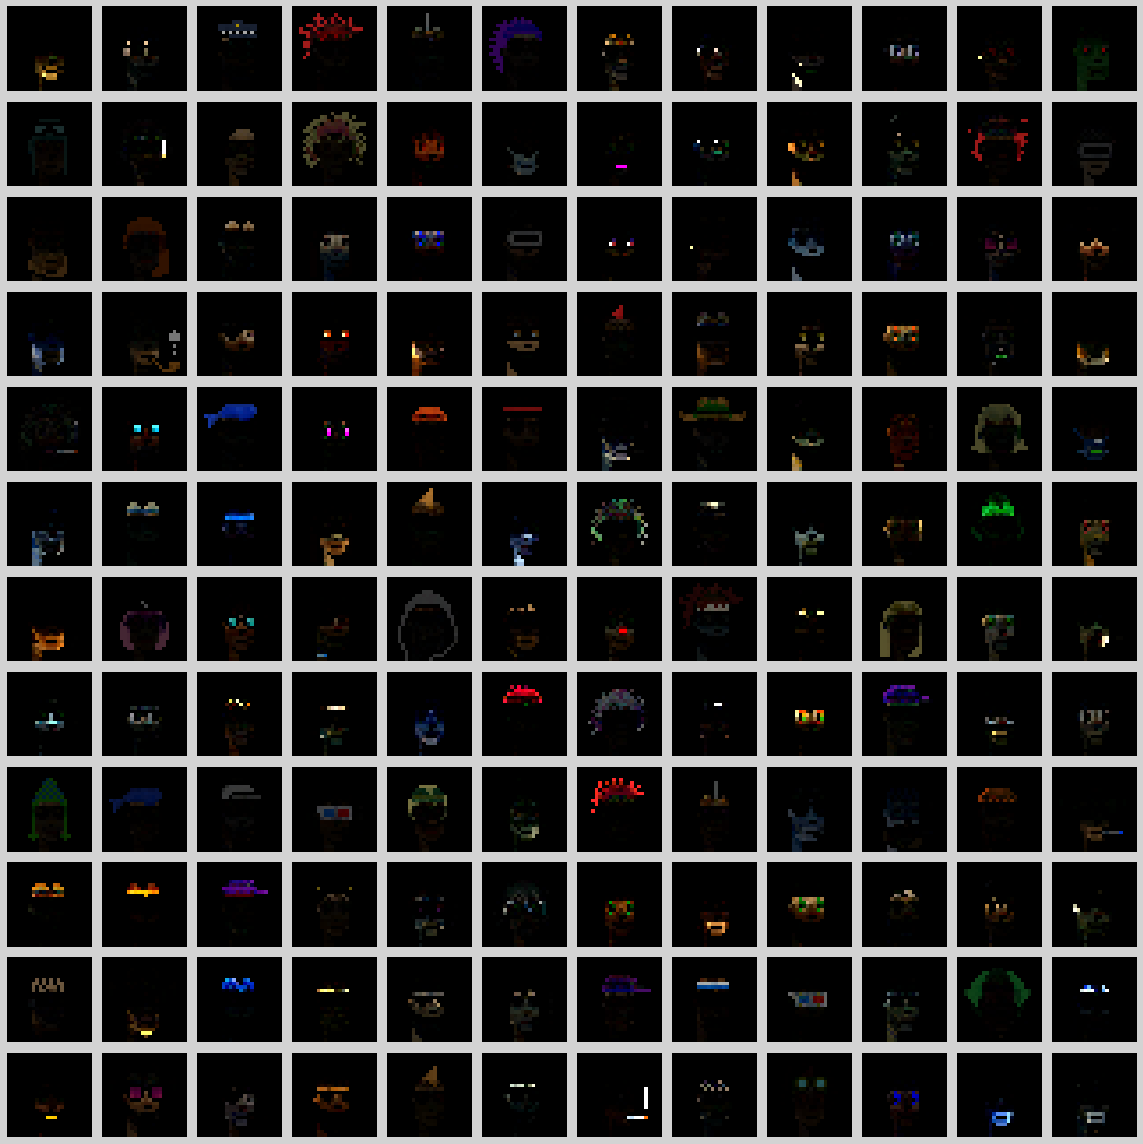

In [19]:
n_s = [4, 8, 12]
for n in n_s:
    d = n**2
    print("d:", d)

    W, H, diff_arr = NMF(faces_reshaped, d)

    W_reshaped = W.reshape(24, 24, 3, d)
    W_reshaped[W_reshaped > 1] = 1

    plotimgs(W_reshaped, n, filename="punks.png")

From the plots, one can conclude that the columns in $W$ holds the information of the facial features for the cryptopunks. In some sense one can understand the columns in $W$ to be basis vectors. The rows in $H$ will then be coefficient vector, weighing the features in $W$ accordingly. The NMF adjusts these coefficients to create a matrix approximating the original. In our $A$ matrix, every row is a different cryptopunk. Creating such a row, the algorithm runs through every feature in $W$ and scaling them appropriately. In a certain way, the cryptopunks will be a linear combination of the features.

Now it makes sense that $W$ extracts the facial features of the cryptopunks. When reconstructing the original matrix, multiple coordinates in $A$ will depend on the same coordinate in $W$, especially when $d$ is small. Therefore, finding similarities in the cryptopunks, i.e facial features, is essential in the recreation of $A$.

From the plots one can clearly see a close relationship between the value of $d$ and how $W$ is constructed. For $d = 16$, our so-called features are almost complete images. Looking closely in the pictures one can see facial traits in all column vectors. Trying to reconstruct $A$ as good as possible, the columns in $W$ consists of a large amount of data. Multiple features need to be put into the same column to make everything fit. 

Note: There are 87 different facial features in addition to 5 different punkt types according to [cryptopunks](https://www.larvalabs.com/cryptopunks/attributes), making it a total of 92 different attributes.

For a small $d$, the NMF finds the most common details in the datasets. Larva Labs categorizes cigarettes, bandanas and nerd glasses to be frequent features. Such features are very prominent when $d = 16$.

For $d$ closer to the amount of facial features, the NMF clusters the data such that approximately each column of $W$ is a unique facial attribute. Yet there are other features observed, such as the skin and shape of the face. This is necessary, since a linear combination of only the facial features could not create an approximated image, it would result with a ghost equipped with facial attributes.

For a larger $d$, the NMF clusters the data with more detail. The columns of $W$ contains therefore additional features to create a better approximation. This detailing is shown in the last plot $d = 144$.

It is also worth mentioning that there is only one basis vector for expressing facial features with different colors. An example is the "Straight hair" feature, which has three colors; blond, brown and black. This facial feature is only expressed by a single basis vector of $W$, where the coefficients in $H$ are used to scale the vector into the associated colors. However the nature of the column layout hinder the color scaling somewhat. Blond and brown hair must be scaled from the same basis vector in $W$. Reshaping the original 4 dimensional matrix makes the information for all three color channels in the same column. Scaling one color channel will equally scale the other, making a reconstruction of both hair colors difficult.

It would be somewhat inaccurate to say that all columns of $W$ would be a distinct facial feature. For $d = 144$ there are multiple instances of the blue head band and purple cap, some consists of a slightly different hue. The cause is probably that $W$ has the freedom to crate more such feature and adapt each individual to its respective faces.

**Face reconstructed**

(24, 24, 4, 500)


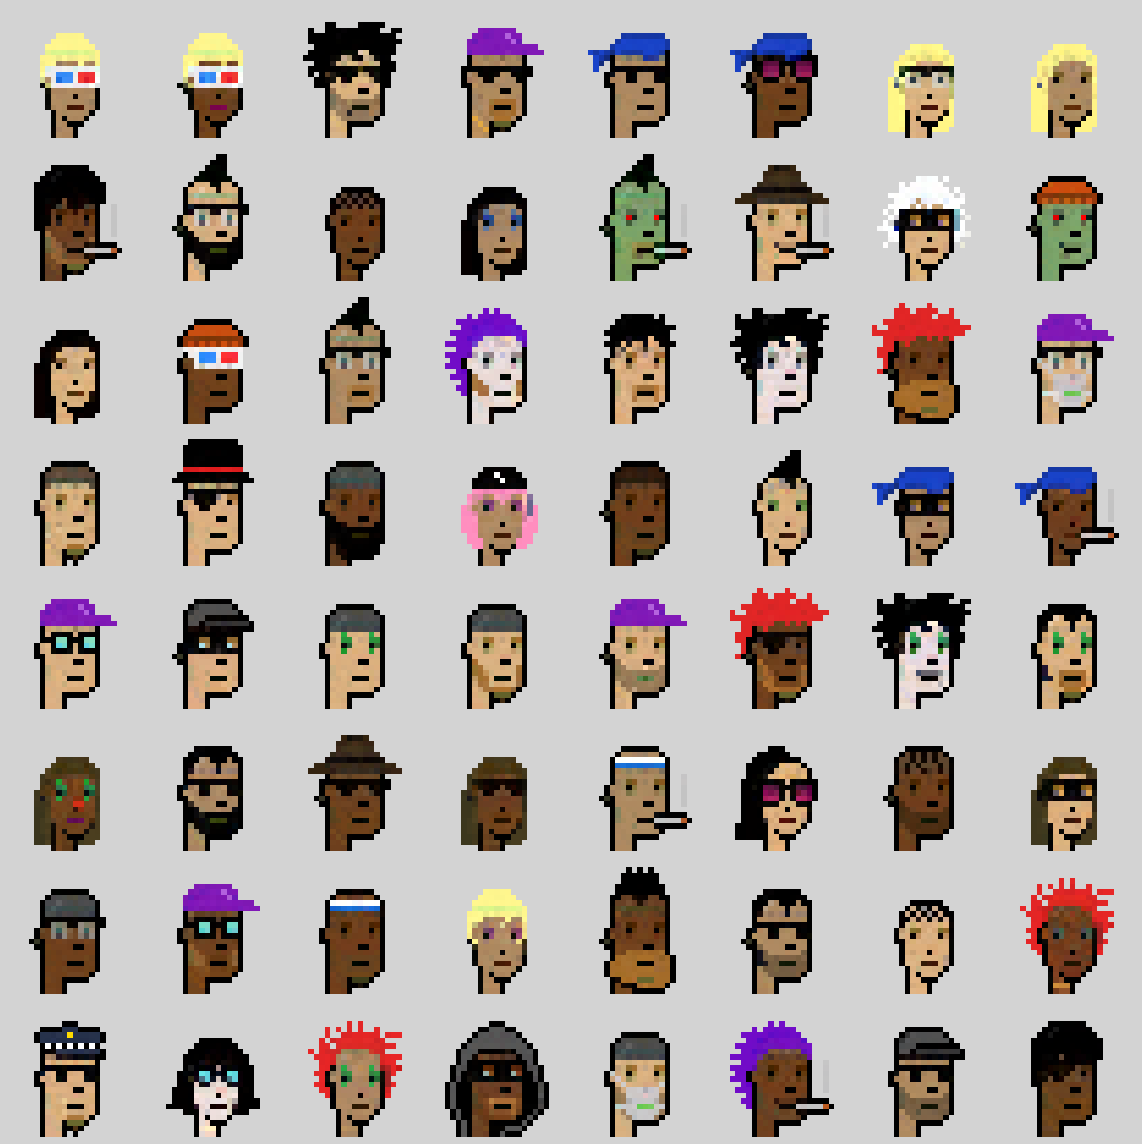

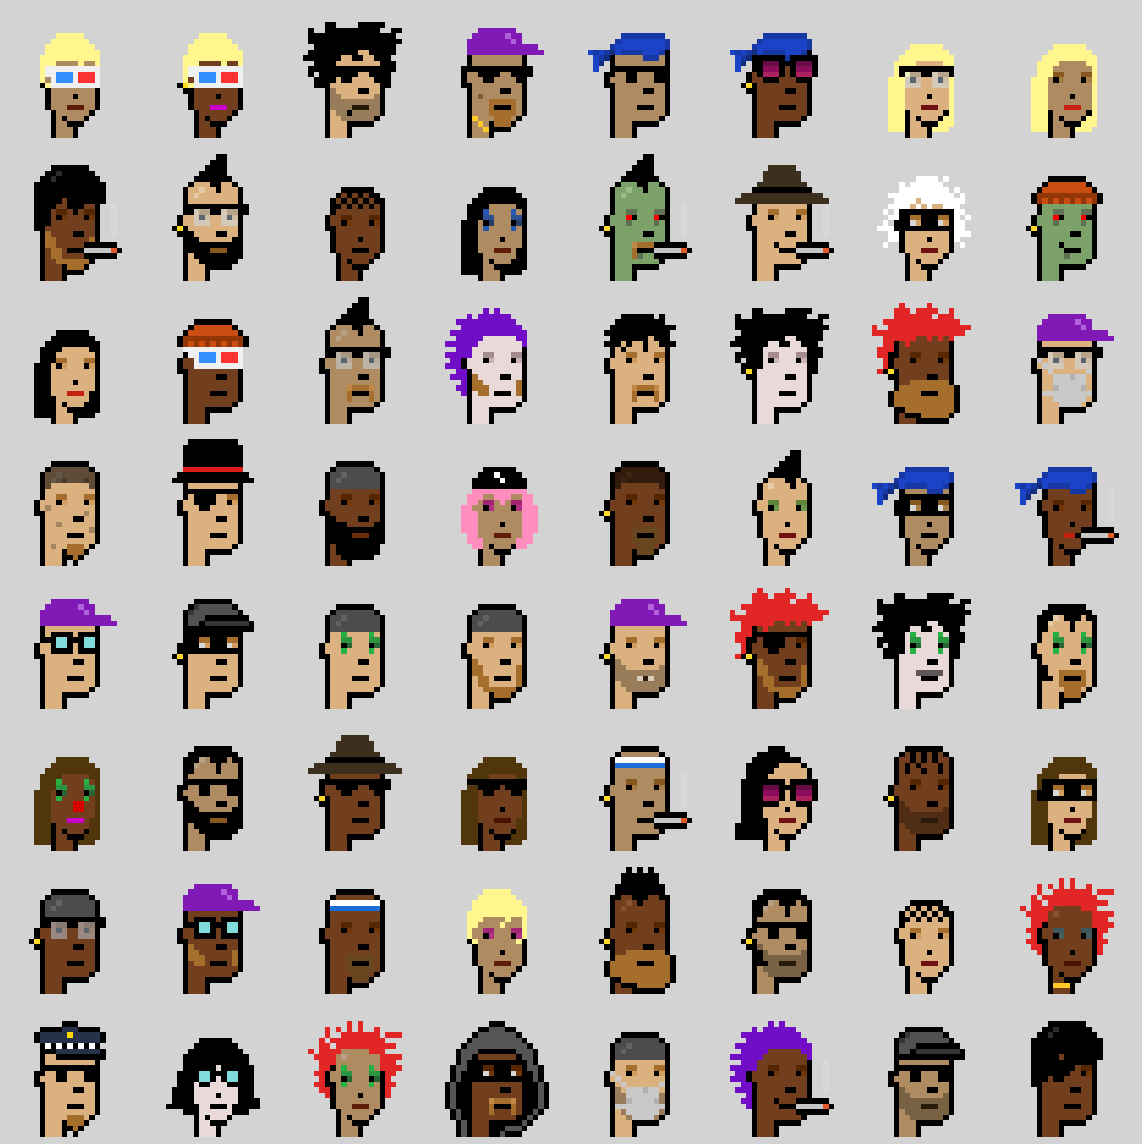

In [20]:
n = 8
def reconstructFace(W, H, N, opacity):
    A = W @ H
    A = A.reshape(24, 24, 3, N)
    A[A > 1] = 1
    A = np.dstack((A, opacity.reshape(24,24,1,N)))
    return A

faces_reconstructed = reconstructFace(W, H, N, faces_opacity)
print(faces_reconstructed.shape)

plotimgs(faces_reconstructed, n, filename="punks.png")
plotimgs(faces, 8, filename="punks.png")

By visual examination we observe the reconstruction to be mostly good. Despite this remark, there are some characteristics of the reconstruction that is worth noticing. 

First of, not every attribute is reconstructed with the same quality. We observe that the black features are very well represented in the reconstruction. This is due to the inherent nature of the NMF approximation algorithm. 

As earlier mentioned, reconstruction is happening by scaling the columns i $W$ by the rows of $H$. Each basis vector in $W$ is possessing a spesific set of RGB values. The only color you can reach from every possible RGB combination by scaling, is the color black. Thus black is for the most part reconstructed correctly.

This argument will hold to a certain extent whent it comes to colors represented by only one or two of the three color channels. This can be varified when looking at the blue and orange features.

Even though the recronstructing is mainly good there are some deviation, mainly consering skin color. The skin color resambles mostly the ones in the original image, but it is a lot less clean, and it is possible to view a mixture of colors in many of the cryptopunks skins. Even though this seems to be a general trend, it appears to be corrolated to the the darkness of the skin color as well.

To further aid our analysis we introduce the plot below as a quantitative manifestation of the difference between the original and the reconstructed image.

[Comparison with the noisy reconstruction](#disco_2)
<a id = 'disco'></a>

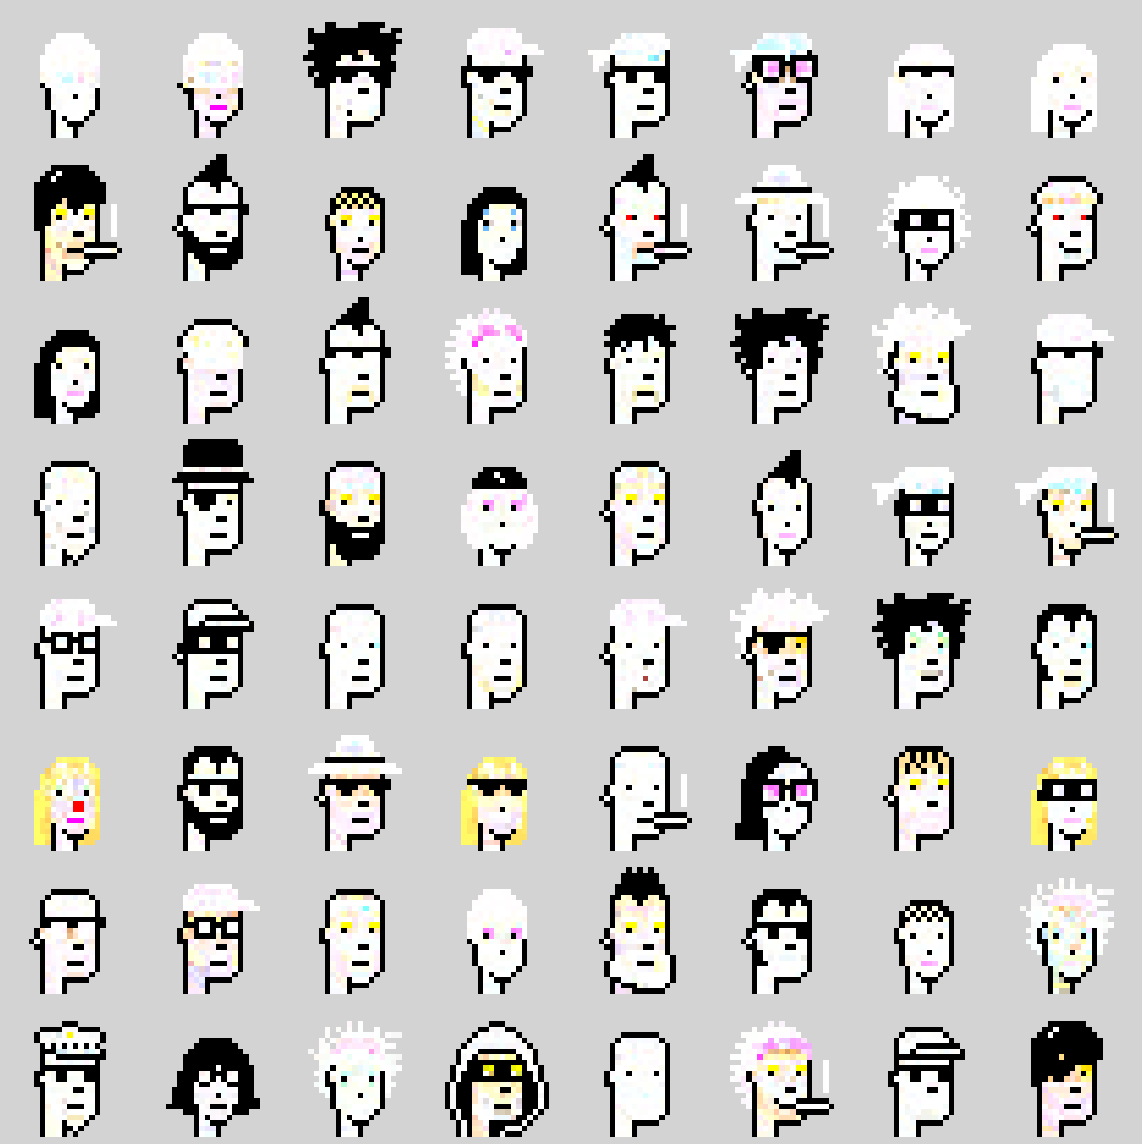

In [21]:
faces_diff = np.divide(faces,faces_reconstructed + 1e-16)
faces_diff[faces_diff > 1] = 1

plotimgs(faces_diff, 8, filename="punks.png")

The above plot is showing the matrix containing the original image divided by the reconstruced one, that is $A \oslash A^{NMF}$. There is though, one immediate concern regarding this approch; the coefficients holding the value $0$. Every black pixel is represented by the value $0$ in the corresponding matrix. Hadamard division is as known entry vise divison, making the representation of the black pixels a problem. 

To overcome this problem we add a small $\delta = 10^{-16}$ to turn every instance of $"\frac{a}{0}"$ for som coefficient $a$ into $\frac{a}{10^{-16}}$, which would not affect the rest of the division in any significant way. By then preforming Hadamard devision of the matricies $A$ and $A^{NMF}$ we obtain a matrix quantitatively describing the error between the reconstructed image and the original image. 

Suppose our reconstructin is perfect, we would have the following:

$$A = A^{NMF} \implies a_{ij} = a^{NMF}_{ij} \quad \forall i,j$$  

This would result in:  

$$A \oslash (A^{NMF} + \delta) \approx A \oslash A^{NMF} = X^{\prime}$$

Where $X^{\prime}$ is a matrix which coefficient:

$$a_{ij} = 0 \iff x_{ij} = 0, \quad a_{ij} \neq 0 \iff x_{ij} = 1$$

This matrix would be displayed in black and white, as every non black attribute would be represented by coefficents containing the value $1$, while the black ones are still represented by the value $0$. It follows that lighter colors indicate smaller errors between the two images. 

The above image strenghten our analysis so far. We observe how the faces with the most color corresponds to the faces with darker skin tones. Furthermore, the plot also showcase how poor reconstructions seems to be correlated to the amount of attributes the spesific cryptopunk is possessing. 

The basis vectors used to reconstruct a cryptopunk will most probably contain multiple cryptopunk attributes. Therefore the more basis vectors needed to reconstruct a cryptopunk, corresponds to a larger likelihood for deviation, due to the enlargend probability of basis vectors containing some of the same data. This is clearly visibal in the reconstructed image.

We also observe how the reconstruction of the straight hair, is for some colors represented well, while in others very poorly. This is clearly seen from the above plot, as well as by visual examination of the reconstructed image. This is in line with the nature of $W$ and $H$ described earlier. 

**$||A-W_k H_k||$ as a function of number of iteration for $d \in \{16,32,64\}$**

In [22]:
#task 2e)
#d = 16
d = 16
W, H, diff_arr_16 = NMF(faces_reshaped, d)

In [23]:
#d = 32
d = 32
W, H, diff_arr_32 = NMF(faces_reshaped, d)

In [24]:
#d = 64
d = 64
W, H, diff_arr_64 = NMF(faces_reshaped, d)

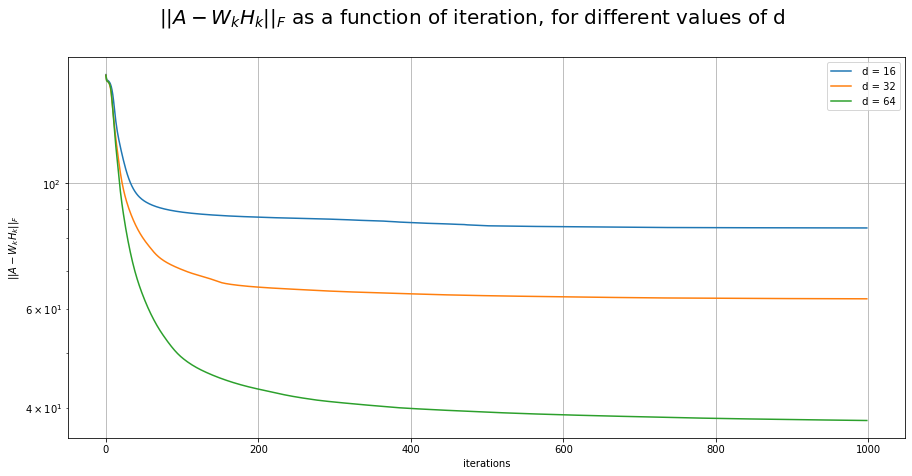

In [126]:
diff_arr = [diff_arr_16, diff_arr_32, diff_arr_64]
diff_names = ["d = 16", "d = 32", "d = 64"]

fig, axs = plt.subplots(1, 1, figsize = (5,6))
fig.suptitle("$||A-W_k H_k||_F$ as a function of iteration, for different values of d", fontsize = 20)
fig.set_figheight(7)
fig.set_figwidth(15)
for i in range(len(diff_arr)):
    axs.semilogy(h, diff_arr[i], label = f" {diff_names[i]}")
    axs.set_xlabel("iterations")
    axs.set_ylabel(r"$||A-W_k H_k||_F$")
    axs.grid()
    axs.legend()

When we increase the $d$ value the matrices represent more information, meaning they will generally give a better approximation for $A$. Our graphs illustrates this bahviour quite well, where $d = 64$ differce the least and $d = 16$ the biggest. As long as $d$ are sufficiently small, less than the rank of the matrix, we are not overfitting. 

It is not all that easy to see whether the algorithm has converged or not. In the case of $d=64$ it certainly has not converged, keeping a steady decrease through out the algorithm. With a sharp eye, and a ruler, there is a tiny tiny decrease for $d = 16$ and $d = 32$. Strictly speaking, the algorithm has not converge for any of our values for $d$. One could increase the amount of iteration in all cases but the decrease can more or less be neglected.

From the above plot, one can conjecture that higher values of $d$ will give a better approximation. To further investigate this matter, we will be using a handful of different $d$'s. We are well aware that the algorithm has yet to converge after $1000$ iteration, but a graphicly ilustrating  $\|A-WH\|_F$ as a funciton of $d$ might still give the general idea of the connection between them. 

**Choosing $d$´s**

When examining how the error $\|A-W_k H_k\|_F$ is dependent upon the parameter $d$, we would like to scrutinize values of $d$ for which data reduction is achived. We have no interest in observing how the NMF behaves if the data amount transmitted has increased. The NMF algorithm outputs an approximation $W H$ to the our matrix $A$. To consider data reduction to be accomplished the amount of coefficients in our matrix $A$ needs to be larger than the amount of combined entries in the matricies $W$ and $H$, i.e. $m \times n > (m \times d + d \times n)$. From this inequality we derive $d  <  \frac{m n}{m + n}$. Moreover, we define $d_{max} = \frac{m n}{m + n}$.

In our specific case we our considering an $m \times n$ matrix where $m = 1728, \space n = 500$. From this, we obtain $d_{max} = \frac{m n}{m + n} = 387.79 \approx 400$. 

Therefore, when investigating $||A-W_k H_k||_F = ||A-W_k H_k||_F(d)$ we would like to use a reasonable sample from the set $\mathcal{M} = [0, d_{max}]$

In [26]:
d_array = d_array_nois = np.arange(16, 400, 20).astype(np.int64)
print(d_array) 

[ 16  36  56  76  96 116 136 156 176 196 216 236 256 276 296 316 336 356
 376 396]


In [27]:
@jit(nopython = True, fastmath = True)
def funcOfD(A, A_norm, d_array, maxiter = 1000):
    norm_of_d = np.zeros(len(d_array))
    count = 0

    for d in d_array:
        W, H, diff = NMF(A, d, maxiter = maxiter)
        norm_of_d[count] = np.linalg.norm(A_norm - W @ H)
        count += 1

    return norm_of_d 

In [28]:
norm_of_d = funcOfD(faces_reshaped, faces_reshaped, d_array, maxiter = 1000)

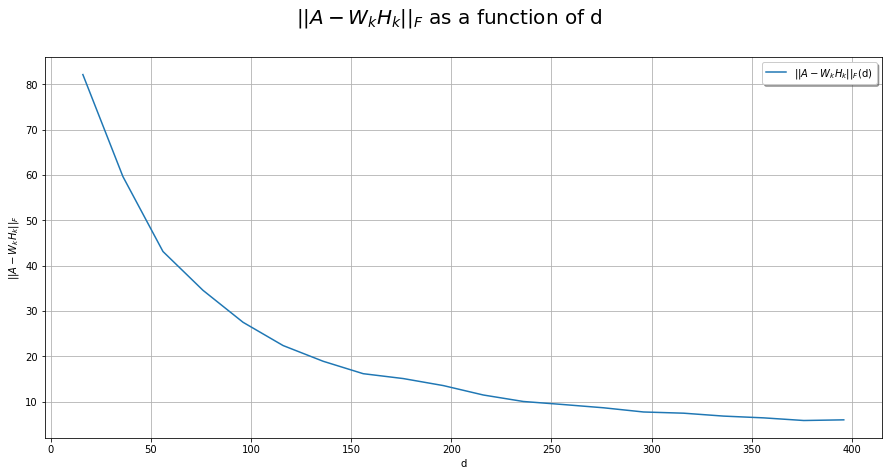

In [142]:
fig, axs = plt.subplots(1, 1)
fig.set_figheight(7)
fig.set_figwidth(15)

fig.suptitle("$||A-W_k H_k||_F$ as a function of d", fontsize = 20)
axs.plot(d_array, norm_of_d, label = "$||A-W_k H_k||_F$(d)")
axs.set_xlabel("d")
axs.set_ylabel(r"$||A-W_k H_k||_F$")
axs.grid()
axs.legend(shadow = True)
plt.show()

Our hypothesis seems to be correct. The norm as a function of $d$ is monotonically decreasing in the entire domain. Both $H$ and $W$ carries more information when $d$ is large making the reconstruction of $A$ more and more precise. 

However from a model coplexity perspective we observe that the significanse of added complexity is reduced as a functon of the model complexity itself, i.e. the curve is flatteing when the complexity is increasing.

**Presence of noise**

In all data communication, one can never guarantee a perfect information flow. Often, slight modifications may pollute our data and may somewhat disturbe the original message. We will see how the NMF preforms in the presence of such noise. We will check if the NMF can recognize the features and reconstruct the original data. 

Our model for adding noise will be to add some error in every coordinate. 

$$A_{noisy} = A + \sigma E $$

Where $\sigma$ is a positive scalar representing the level of noise and $E$ is a matrix with random coordinates. The shape of $E$ will be similar to $A$ and every entry will be a choosen from a normal distribution with mean $0$ and variance $1$ $(\mathcal{N}(0,1))$. This is a realistic model of what happens since signal error is genuinely random.

A prerequisite for the image plotting is that every entry is between $0$ and $1$. Since our normal distribution may give negative random, we will modify the error somewhat. If, after noising, any entry is lower than $0$ or bigger than $1$, one can be sure that some error has occurred. To make sure images can be plot after adding noise, we will set a lower and an upper bound.

In [30]:
def add_noise(imgs_reshaped, sigma = 0):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    #sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces


**Display of added noise**
<a id='noise'></a>

[Denoising comparison](#denois)

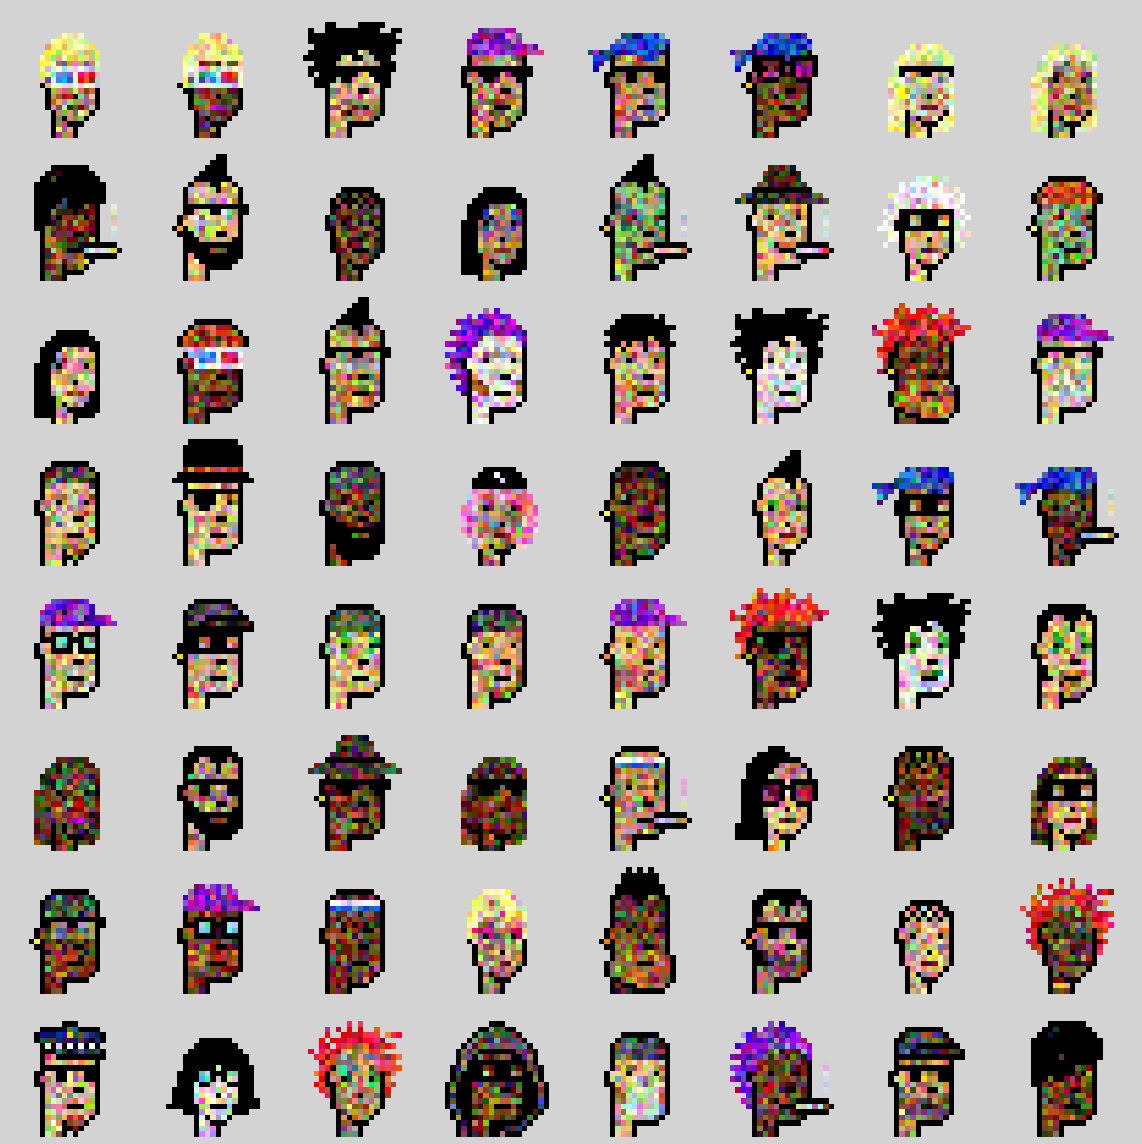

In [31]:
noisy_faces = add_noise(faces_reshaped, sigma = 0.2)

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(noisy_faces_with_opacity)

In [32]:
#task 3a)
diff_noise = np.linalg.norm(noisy_faces - faces_reshaped, 'fro')

print(f"Norm(A_noisy - A)_F:", diff_noise)

Norm(A_noisy - A)_F: 79.51107174112677


**Human recognition vs Frobenius norm**

Frobenius norm of a $\|A-WH\|$ will give a value describing the difference in $WH$ and $A$. The general formula is, as mentioned before, the square root of the sum of all entries squared. Since Frobenius norm takes all coordinates into account, the value representing their similarity might differ from how a human would think. Say two cryptopunks were to have the same identical faces and features except the color of their long hair, which is black and brown respectively. Now a human might argue that these cryptopunks are almost duplicates, but since the hair is representing by a handful of pixels, the Frobenius norm gets a contribution from a whole bunch of coordinates making the value large. The norm only values quantity, meaning the human brain might prioritize different. If the eye color were the altering factor, Frobenius norm would give a different answer even though both cases has a single feature mismatching. 

Despite this, we will still be using Frobenius norm to meassure difference in $WH$ and $A$ since it has proven quite usefull with NMF thus far. 

**Attributes of cryptopunks extracted from noisy images**

In the following section, we examine to what extent added nois disturbes the computers ability to extract decent information about the cryptopunks attributes. The plot below shows the extracted attributes when the NMF algorithm is applied to the set of noisy images.

(1728, 64)


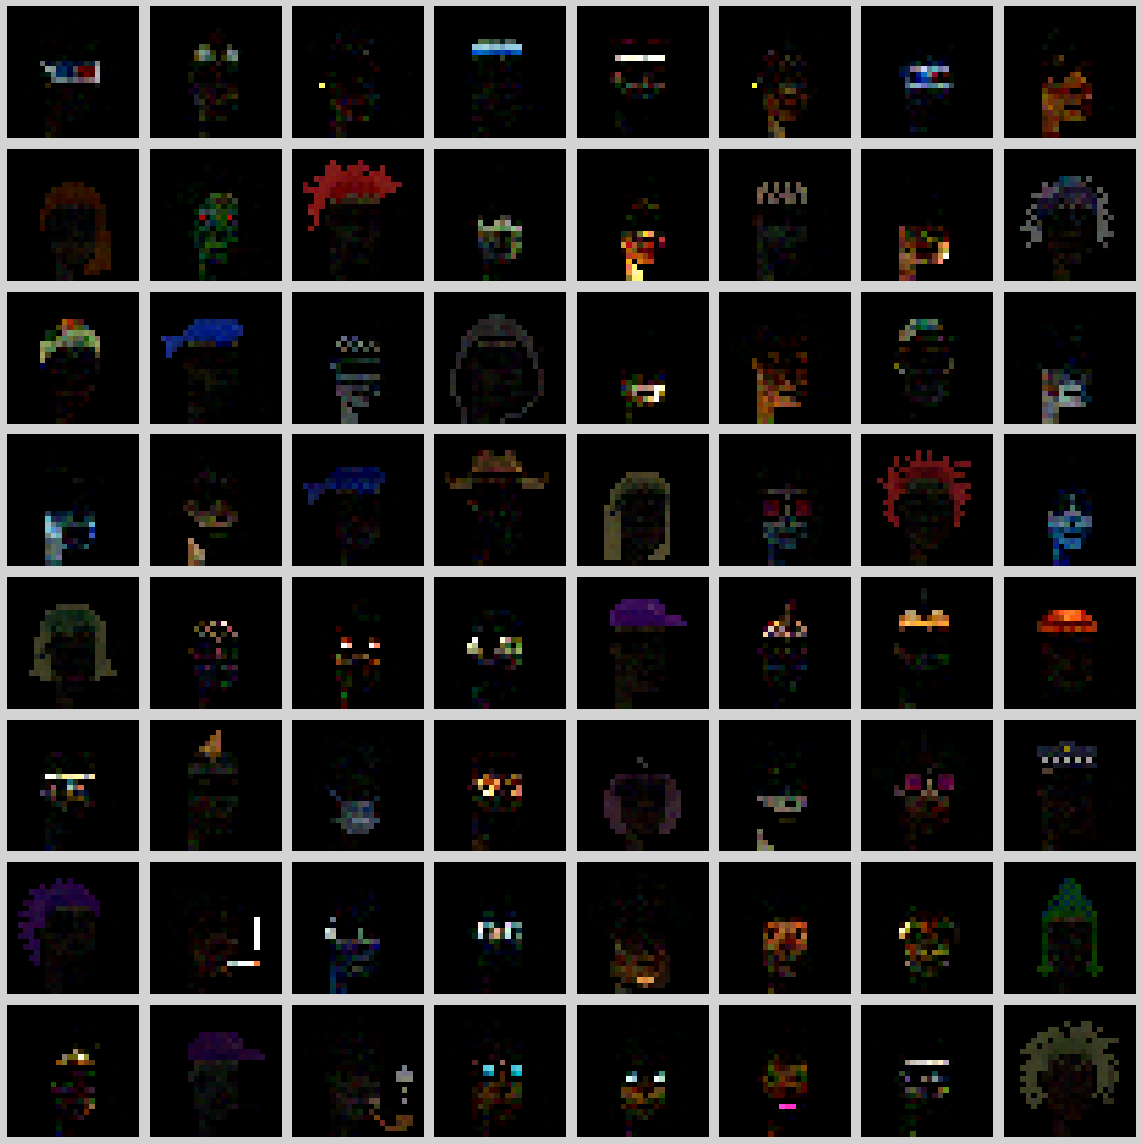

In [135]:
#task 3b)
n = 8
d = n**2

W_noise, H_noise, diff_arr = NMF(noisy_faces, d)
print(W_noise.shape)
W_noise_reshaped = W_noise.reshape(24, 24, 3, d)
W_noise_reshaped[W_noise_reshaped > 1] = 1

plotimgs(W_noise_reshaped, n, filename="punks.png")

<a id='features_nois'></a>
If we compare the plot if these basis vectors to the ones we did [earlier](#Facial_features), one can clearly see a resemblance between the two. The general shape of the facial features are extracted quite good, but most features are affected by the noise. Overall the features in our $W$ are less noise than the input matrix. Since the denoised facial features will be a good approximation for all the different instances postnoise, it makes sense that some noise has dissapeared.


The noise will have generaly have a greater impact on smaller features like eye glasses or eyeshadow. This is because it is a smaller set of data and the understanding of the feature is then reduced. When being polluted by noise, the approximated feature is slightly coarser than before. Thus making smaller attributes more expossed to pollution. 

**Denoising with NMF**

It would be of interest to scrutinize the NMF algorithm´s ability to be utilized for denoising. By running the NMF algorithm with a reasonable complexity, $d$, on a data set affected by noise, the data reduction occuring could potentialy lead to the removal of noise. In the following section we reconstruct the noisy image from the NMF algorithem and compare it to the original data set.

(24, 24, 4, 500)


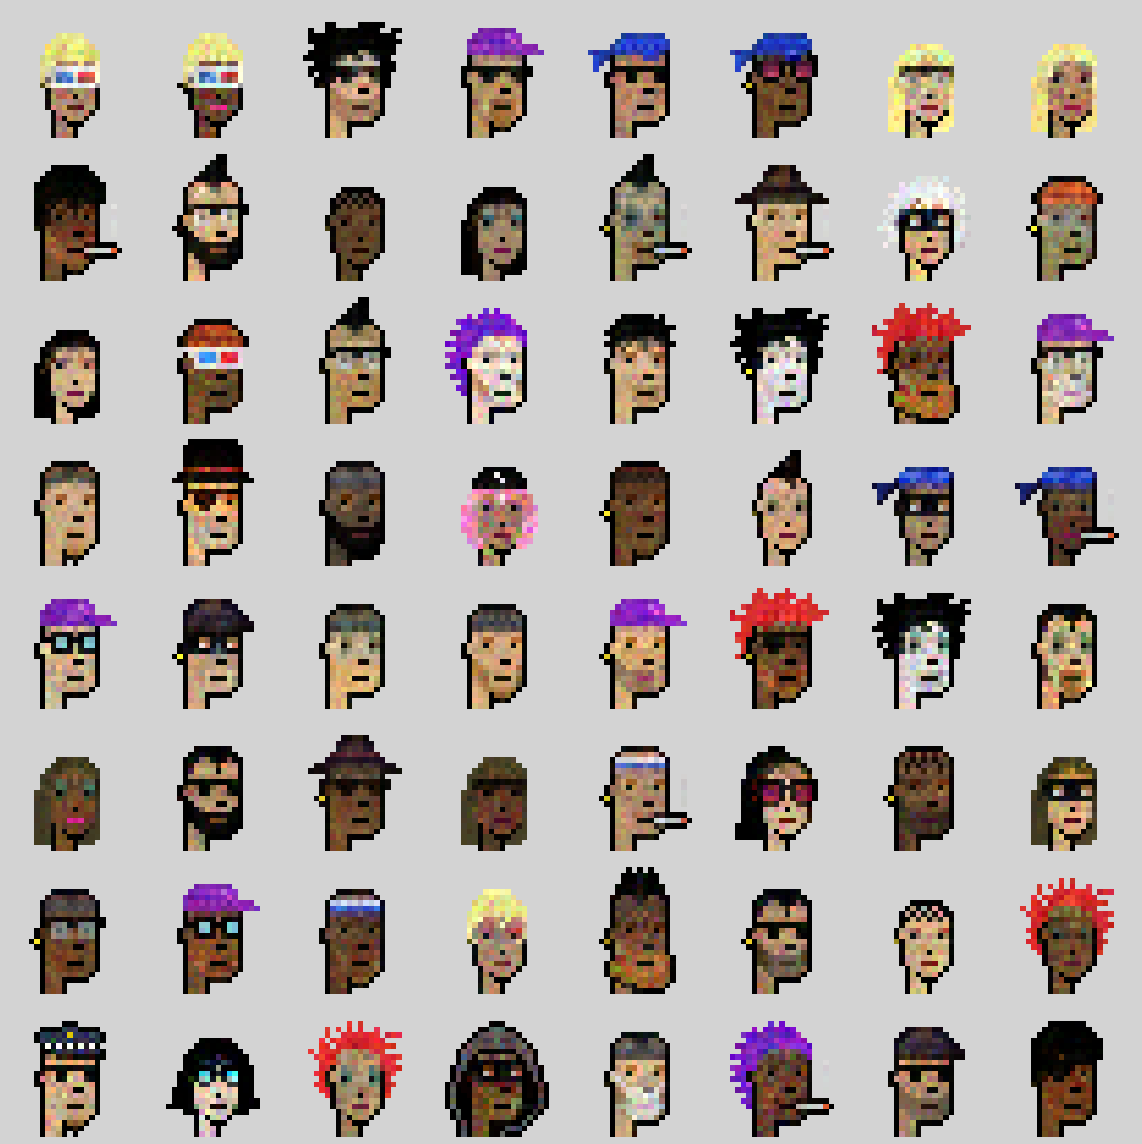

In [132]:
faces_reconstructed_nois = reconstructFace(W_noise, H_noise, N, faces_opacity)

print(faces_reconstructed.shape)

plotimgs(faces_reconstructed, n, filename="punks.png")

<a id='denois'></a>
By visual inspection we observe that a reasonalbe complexity, such as $d = 64$, results in some degree of denoising. The image is not perfectly reconstructed, but we see a stronger resemblance to the [original image](#original) than we did for the [noisy image](#noise). To further investiget the NMF´s ability to preform a denoising we need a more thorough investigation of the reconstruction produced by the [noisy image](#noise) and of the [original one](#original). 

Again to aid our analysis, we introduce the same plot as we did before to showcase the quantitative difference between the original data set and the denoised one.

<a id='disco_2'></a>

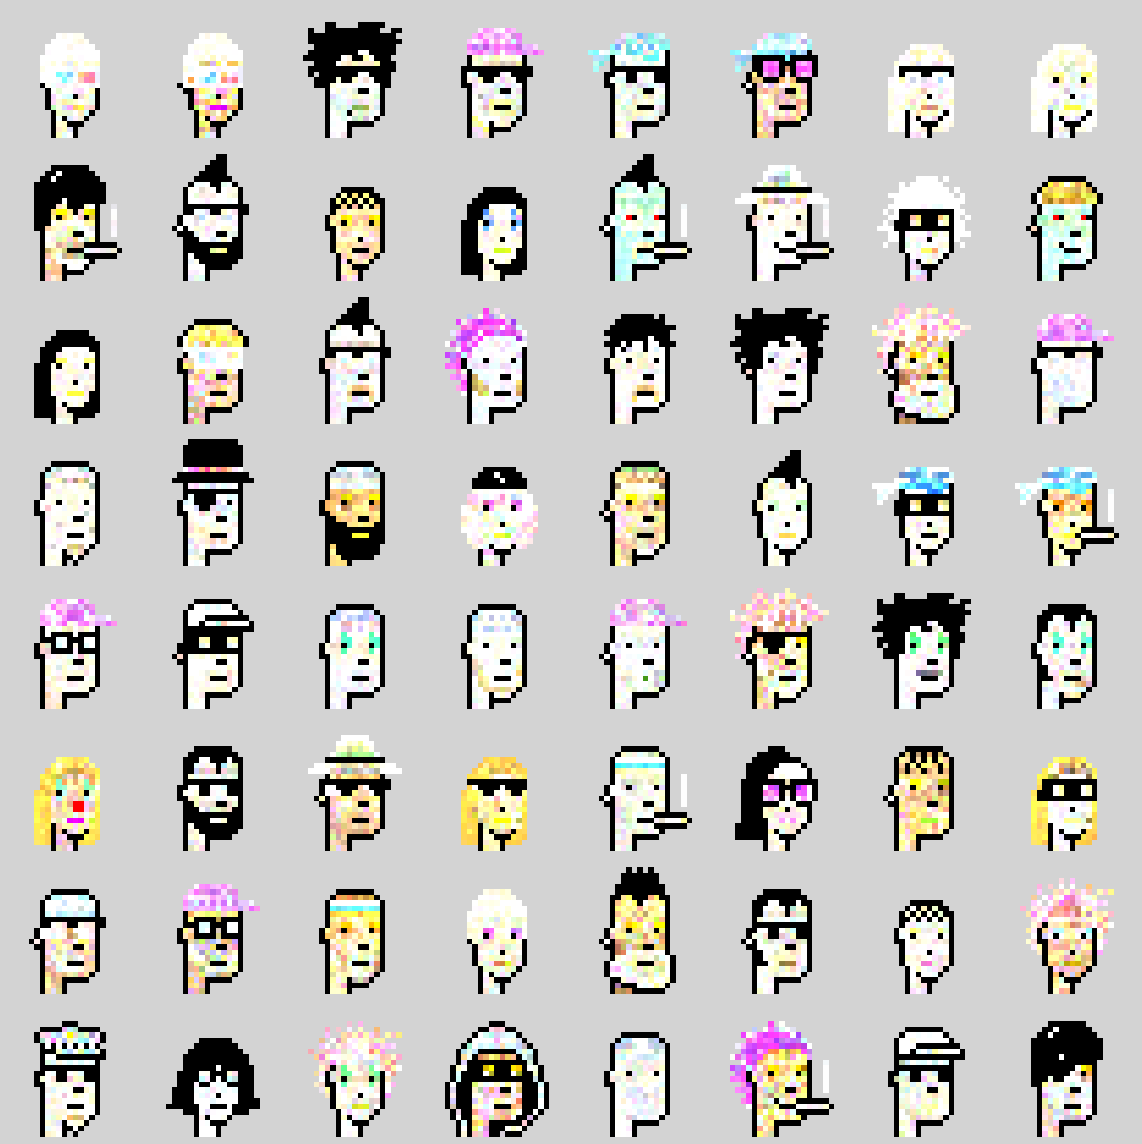

In [133]:
diff_img = np.divide(faces, faces_reconstructed_nois + 1e-16)
diff_img[diff_img > 1] = 1

plotimgs(diff_img, 8, filename="punks.png")

In the above plot we observe more vibrant colores than for the [original reconstruction](#disco). However these areas seems to follow the same patterns as the reconstruction done from the original image. 

We observe, that the skin of the cryptopunks is a topic of bad reconstruction. This is once more corrolated to the darknes of the skin tone. There is also a strong relation between the amount of attributes a cryptopunk is possessing and the accuracy of the reconstruction. This is due to the increased disturbance we inheret from the added nois. 

Another property of the denoised image is how some spesific attributes, like the face mask and the brown beards is to a greater extent reconstructed poorly. Pixels that could be occupied by a large amount of attributes, i.e. the area around a cryptopunks mouth, are harder to reconstruct. This could be seen in the reconstruction of face masks and beards.

A plausible explanation to this would be regarding the NMF´s ability to extract decent information from the matrix it is aplied to. The more attributes that is located in a given area, the more data needs to be represented in the specific column of $W$. This combined with the added noise makes the already disturbed data even more fragmentary, making the reconstruction even harder.

As a final remark we will consider the NMF algorithem to contain characteristics of a denoiser. As earlier mentioned the wrongness of the denoised image is of the same type as those of a regular reconstruction with NMF. However these deviations are now strengthened. Thus defining a limit to which occasions NMF is suitable as a denoiser. That is a case in which the NMF algorithem recreates the original matrix with a significant degree of presicion, while still reducing the amount of data.

When reciving a polluted image, one might not be able to know whether or not NMF reconstructs the original image, making this a clear counter argument to utalizing the NMF as a denoiser. Nonetheless, given our matricies and knowledg of NMF´s ability to reconstruct these, we conclude the NMF algorithm to work well as a denoiser for our given dataset.

In [36]:
norm_of_d_nois = funcOfD(noisy_faces, faces_reshaped, d_array, maxiter = 1000)

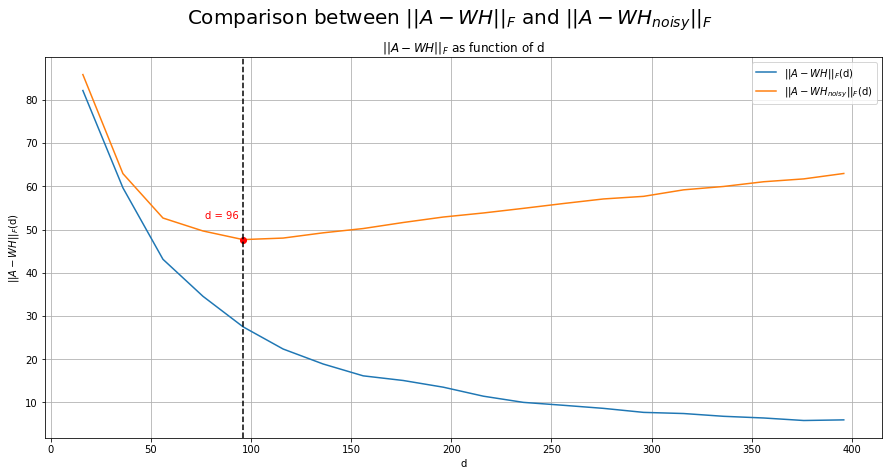

In [119]:
titles = ["$||A - W H||_F$ as function of d"]
labels = ["$||A - W H||_F$(d)", "$||A - W H_{noisy}||_F$(d)"]

d_arrays = [d_array, d_array_nois]
norms = [norm_of_d, norm_of_d_nois]

fig, axs = plt.subplots(1, 1)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("Comparison between $||A - W H||_F$ and $||A - W H_{noisy}||_F$", fontsize = 20)
    
axs.title.set_text(titles[0])
axs.plot(d_arrays[0], norms[0], label = labels[0])
axs.plot(d_arrays[1], norms[1], label = labels[1])
    
# Add lowest point
local_minima = argrelextrema(norms[1], np.less)
axs.plot(d_array[local_minima[0]], norm_of_d_nois[local_minima[0]], 'o', color = 'r')
axs.text(d_array[local_minima[0][0]]*0.8, norm_of_d_nois[local_minima[0]]*1.1, f"d = {d_array[local_minima[0][0]]}", color = 'r')
axs.axvline(d_array[local_minima[0][0]], color = 'k', linestyle = '--')

axs.set_xlabel("d")
axs.set_ylabel(labels[0])
axs.grid()
axs.legend()
plt.show()

**Underfitting and overfitting**

By the nature of the NMF, $\space WH$ will try to extract recurring traits. When the value of $d$ is large, the basis vectors of $W$ possesses alot in freedom and can fill the column vectors with seperate traits. With such freedom, the NMF learns alot form the unwanted noise. In the pursuit of creating the input matrix perfectly, the noise will also be taken into consideration. Therefore, it will reproduce $A$ with such precision that the noise remains present. This is an example of overfitting, trying to reproduce the input perfectly without caputing the essence in the data. Overfitting can be prevented by lowering the complexity $d$.

For smaller values of $d$, the NMF struggles to capture the entire picture within $W$ and $H$. The basis vectors $W$ will not carry enough information to produce a good resembling $A$. The direct consequence is how the final $WH$-image will not have enough detail and the end product will be inaccurate. This is called underfitting, which is prevented by choosing a larger $d$.


To obtain the most accurate resemblence of the original matrix, we need to maintain a balance between over and underfitting. For our model, we have used $\sigma = 0.2$, and our respective plot indicates that $d$-values around $96$ seems to denoise the most. We suspect this is due to the the amount of features is around being $92$. If the $W$ can capture all the separate features in their original fashion, the reconstructed will more or less be "noisefree". 


Another element effecting the result is the amount of faces we use $N$. Since the same feature is most likely noised different, $W$ might try to construct the original feature as a basis vector. Increasing the amount of faces will give more data for each feature, increasing the precision of the basis vectors. It could therefore be chosen a larger $N$ to counteract the noise, but in this case it would be computional and time demanding. However, we remain consistent and keep $N$ to be $500$.

In [39]:
print(norm_of_d_nois[local_minima[0]])

[47.67644739]


**Testing for different sigmas**

To further investiage our suspicion we will find the best values for $d$ given a sigma. We will check for $\sigma \in \{0.05, 0.1, 0.15, 0.2, 0.25, 0.3\}$ and find the global minima. It is important to have a large sample space without making $\sigma$ too big. In such case the noisy image will have no resemblance to the original.

In [52]:
noisy_faces_1 = add_noise(faces_reshaped, sigma = 0.05)
norm_of_d_nois_1 = funcOfD(noisy_faces_1, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.05")

Sigma: 0.05


In [53]:
noisy_faces_2 = add_noise(faces_reshaped, sigma = 0.1)
norm_of_d_nois_2 = funcOfD(noisy_faces_2, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.10")

Sigma: 0.10


In [54]:
noisy_faces_3 = add_noise(faces_reshaped, sigma = 0.15)
norm_of_d_nois_3 = funcOfD(noisy_faces_3, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.15")

Sigma: 0.15


In [55]:
noisy_faces_4 = add_noise(faces_reshaped, sigma = 0.20)
norm_of_d_nois_4 = funcOfD(noisy_faces_4, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.20")

Sigma: 0.20


In [56]:
noisy_faces_5 = add_noise(faces_reshaped, sigma = 0.25)
norm_of_d_nois_5 = funcOfD(noisy_faces_5, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.25")

Sigma: 0.25


In [57]:
noisy_faces_6 = add_noise(faces_reshaped, sigma = 0.30)
norm_of_d_nois_6 = funcOfD(noisy_faces_6, faces_reshaped, d_array, maxiter = 1000)
print("Sigma: 0.30")

Sigma: 0.30


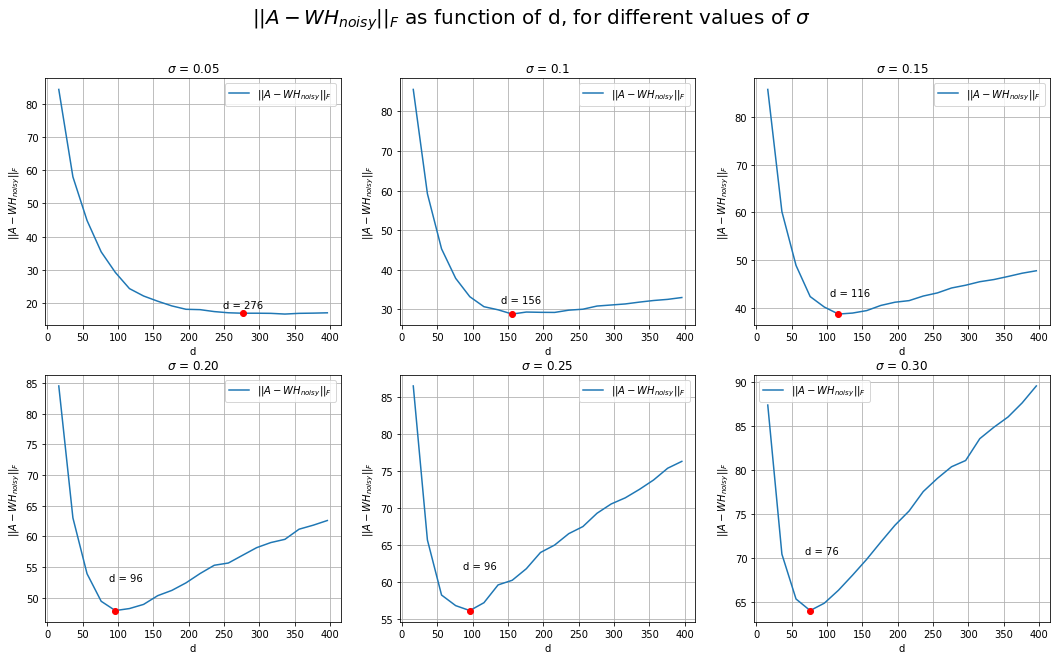

In [122]:
sigmas_1 = [r'$\sigma$ = 0.05', r'$\sigma$ = 0.1', r'$\sigma$ = 0.15']
sigmas_2 = [r'$\sigma$ = 0.20', r'$\sigma$ = 0.25', r'$\sigma$ = 0.30']

norms_1 = [norm_of_d_nois_1, norm_of_d_nois_2, norm_of_d_nois_3] 
norms_2 = [norm_of_d_nois_4, norm_of_d_nois_5, norm_of_d_nois_6]

norms = [norms_1, norms_2]
titles = [sigmas_1, sigmas_2]

fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(18)
fig.suptitle("$||A - W H_{noisy}||_F$ as function of d, for different values of $\sigma$", fontsize = 20)
    
for i in range(len(axs)):
    labels = ["$||A - W H||_F$(d)"]
    for j in range(len(sigmas_1)):
        axs[i][j].title.set_text(titles[i][j])
        axs[i][j].plot(d_array, norms[i][j], label = "$||A - W H_{noisy}||_F$")
        
        local_minima = argrelextrema(norms[i][j], np.less)
        if len(local_minima[0]) == 2:
            axs[i][j].plot(d_array[local_minima[0][0]], norms[i][j][local_minima[0][0]], 'o', color = 'r')
            axs[i][j].text(d_array[local_minima[0][0]]*0.9, norms[i][j][local_minima[0][0]]*1.1, f"d = {d_array[local_minima[0][0]]}")
        else:
            axs[i][j].plot(d_array[local_minima[0]], norms[i][j][local_minima[0]], 'o', color = 'r')
            axs[i][j].text(d_array[local_minima[0]]*0.9, norms[i][j][local_minima[0]]*1.1, f"d = {d_array[local_minima[0][0]]}")

        axs[i][j].set_xlabel("d")
        axs[i][j].set_ylabel("$||A - W H_{noisy}||_F$")
        axs[i][j].grid()
        axs[i][j].legend()

plt.show()



To some extent these plots ilustrates our hunch. We have seen that bigger values of $d$ corresponds. will better without noise. However, we see that this is not the case when noise is present. When the $\sigma$ value is low, the general trend of bigger is better still holds. For $\sigma = 0.05$ there is clearly an "L" shape and the difference in $d = 276$ and $d = 380$ is quite small. The noise is almost negligible and the NMF behaves like usual, extracting the essence of the original image through the disturbance. 

When the $\sigma$-value increases, the shape of the graph slowly transforms into an "U", decreasing the $d_{best}$. However for both $\sigma = 0.2$ and $\sigma = 0.25$, the best value is around $d = 96$. It seems as for a moderate amount of noise, the most accurate value for $d$ will be the amount of features a cryptopunk can possess. When the noise increases further, the noising overwhelms the image, making NMF stuggle to find the important details. For $\sigma = 0.3$ the interval for "good choises of $d$" is quite small, but $92$ is still pressent. For most of the graphs one can also spot how $d = 92$ is a great choice.

**Conclusion**

Throguhout the project we have utalized non-negative matrix factorization and gained some experience on machine learning and how to handle large datasets when communicating. Our NMF model were hardly ever able to reconstruct matrices perfectly, but one could clearly see a close resemblance to the original matrix. Even though, the information in its entirety is not sent, we reckon the NMF-approximation to catch the essence, showcasing a good lookalike to the original matrix. Moreover, the NMF had some practical use in reverting noise. If by some chance our initial matrix gets polluted by noise, the NMF were quite efficient recognizing distinct features and reconstruct the originial matrix in advance of noiseing. If the noise were not overwhelming, the basis vectors in $W$, which can be seen as features in our case, will still somewhat extract the original basis vectors. Therefore, the recreating of $A$ is quite precise. 